# USA HOUSING PRICES 

#  1. INTRODUCTION

The real estate market is a crucial sector for both buyers and sellers, influencing investments, urban development, and financial planning.

The goal is to develop a predictive model that estimates a property’s price based on its characteristics such as location, size, condition, and other relevant features. By analyzing historical data, we can create a data-driven pricing strategy to enhance decision-making in the real estate market.

# Description of each dataset feature:

Date: The date when the property was sold. This feature helps in understanding the temporal trends in property prices.

Price:The sale price of the property in USD. This is the target variable we aim to predict.

Bedrooms:The number of bedrooms in the property. Generally, properties with more bedrooms tend to have higher prices.

Bathrooms: The number of bathrooms in the property. Similar to bedrooms, more bathrooms can increase a property’s value.

Sqft Living: The size of the living area in square feet. Larger living areas are typically associated with higher property values.

Sqft Lot:The size of the lot in square feet. Larger lots may increase a property’s desirability and value.

Floors: The number of floors in the property. Properties with multiple floors may offer more living space and appeal.

Waterfront: A binary indicator (1 if the property has a waterfront view, 0 other-wise). Properties with waterfront views are often valued higher.
    
View: An index from 0 to 4 indicating the quality of the property’s view. Better views are likely to enhance a property’s value.

Condition: An index from 1 to 5 rating the condition of the property. Properties in better condition are typically worth more.

Sqft Above: The square footage of the property above the basement. This can help isolate the value contribution of above-ground space.

Sqft Basement: The square footage of the basement. Basements may add value depending on their usability.

Yr Built: The year the property was built. Older properties may have historical value, while newer ones may offer modern amenities.

Yr Renovated: The year the property was last renovated. Recent renovations can increase a property’s appeal and value.

Street: The street address of the property. This feature can be used to analyze location-specific price trends.

City: The city where the property is located. Different cities have distinct market dynamics.

Statezip: The state and zip code of the property. This feature provides regional context for the property.

Country: The country where the property is located. While this dataset focuses on properties in America, this feature is included for completeness.

# 2. IMPORTATION OF DIFFERENT LIBRARIES AND DATA CLEANSING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('USA Housing Dataset.csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,8.000000e+05,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4136,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4137,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4138,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [3]:
# Concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [4]:
# Check number of samples and variables is as expected
df.shape

(4140, 18)

In [5]:
# Check for zero values
df[df==0].count()

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4109
view             3722
condition           0
sqft_above          0
sqft_basement    2476
yr_built            0
yr_renovated     2462
street              0
city                0
statezip            0
country             0
dtype: int64

The presence of 0 in the columns 'waterfront,' 'view,' 'sqft_basement,' and 'yr_renovated' is normal. This indicates that the house does not have a waterfront, a view, does not have a basement, and has never been renovated. 

The houses with zero (0) as price, bedrooms and bathrooms need to be treated appropriately. 

In [6]:
# Chek for missing values 
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [7]:
# Check for any garbage in the form of a question mark(?)
(df == '?').sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [8]:
# Check for any duplicates
df.duplicated().sum()

0

# 3. EXPLORATORY DATA ANALYSIS (EDA)

In [9]:
# Descriptive statistics to summarise the numerical distribution of the dataset
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


In [10]:
# Descriptive statistics to summarise the distribution of categorical variables in the dataset
df.describe(include='object')

,date,street,city,statezip,country
count,4140,4140,4140,4140,4140
unique,68,4079,43,77,1
top,2014-06-23 00:00:00,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,4,1415,128,4140


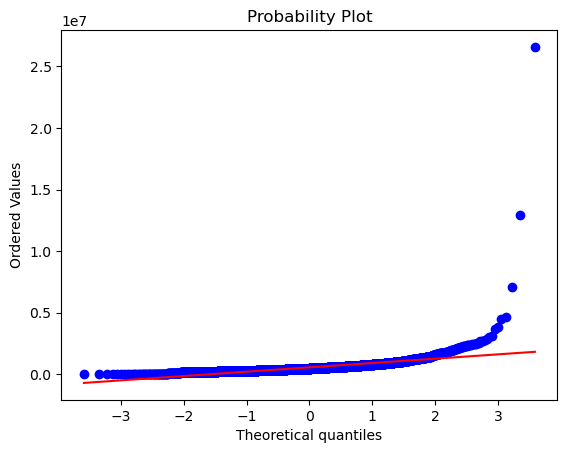

In [11]:
# Data distribution should closely follow the diagonal that represents the normal distribution.
# This is a Q-Q (Quantile-Quantile) plot, which is used to assess whether a dataset follows a normal distribution.

res = stats.probplot(df['price'], plot=plt)

The blue dots represent the actual data points from your housing prices and the red line represents the ideal normal distribution..

We can observe that the data points deviate significantly from the red line, especially at the higher end (right side).
Also, there are large deviations at the upper quantiles, suggesting a right-skewed distribution with outliers indicating very high house prices.

This indicates that the price column is not normally distributed and has high variance due to extreme values (luxury homes with very high prices).

# Histograms representing the distribution of continuous variables

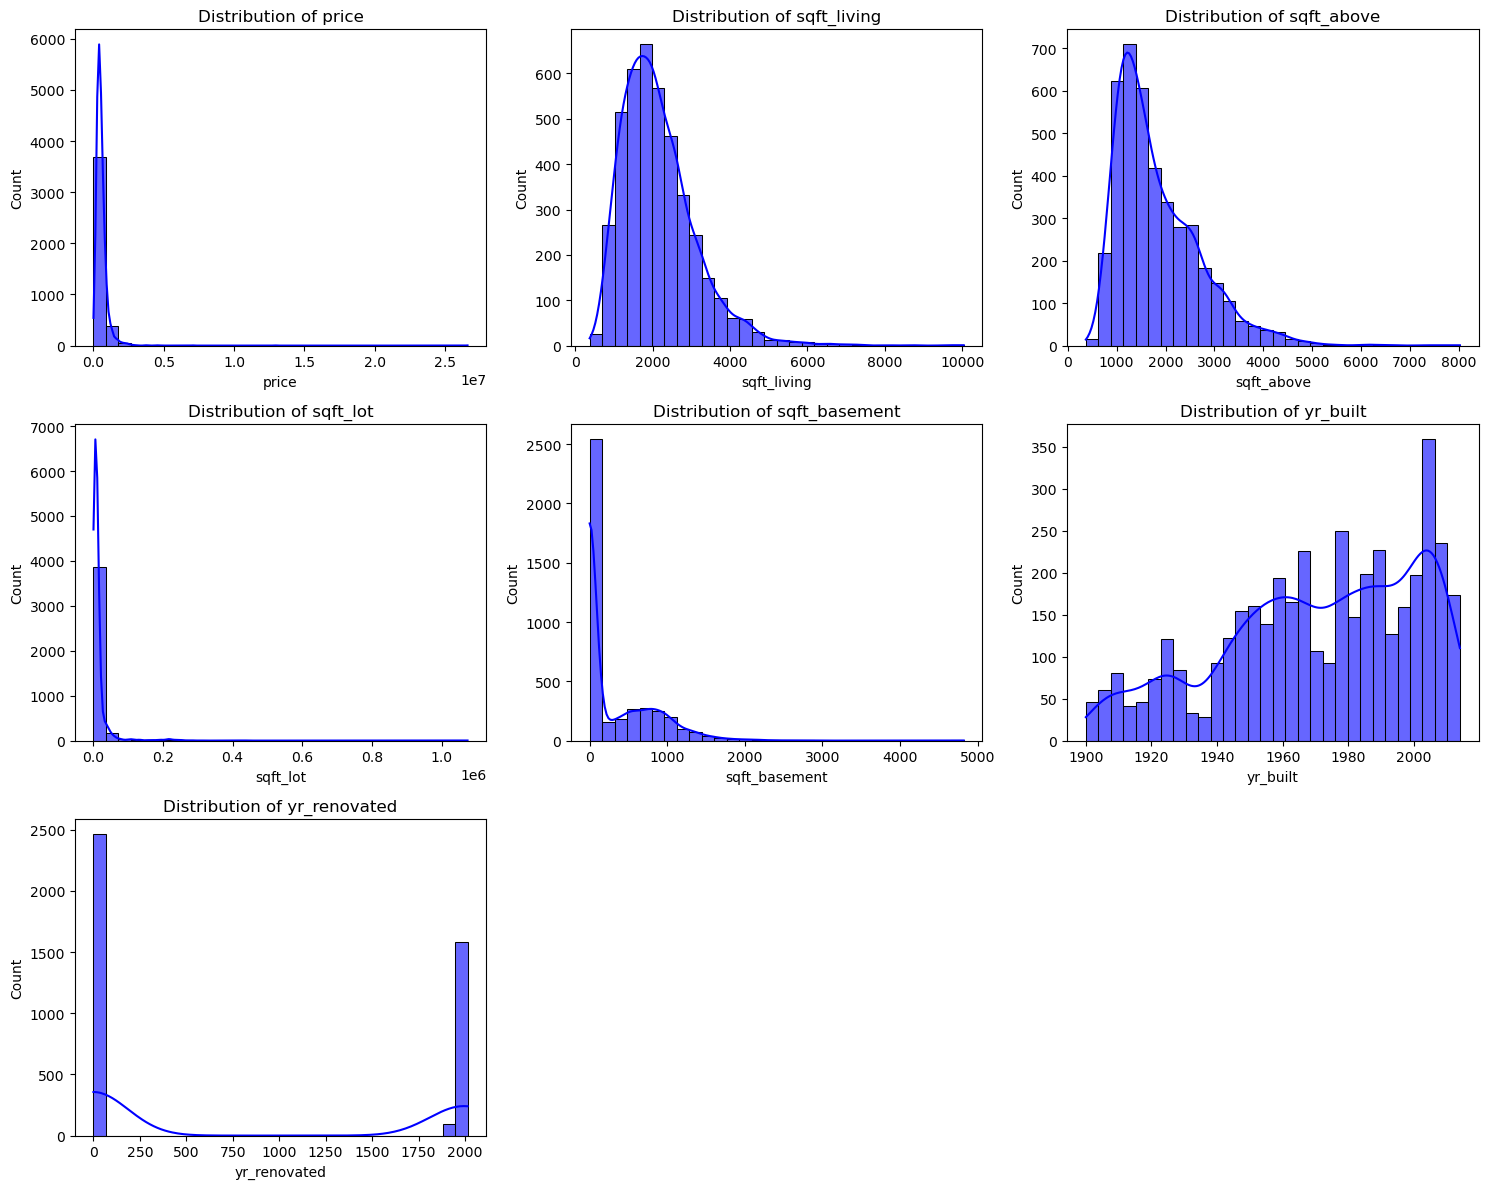

In [12]:
# Select numerical columns to visualize
columns_to_plot = ['price', 'sqft_living', 'sqft_above', 
                   'sqft_lot', 'sqft_basement', 'yr_built', 'yr_renovated']

# Set the figure size
plt.figure(figsize=(15, 12))

# Define grid size (3 rows, 3 columns)
rows = 3
cols = 3

# Loop through selected columns and plot histograms
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(rows, cols, i)  # Adjust to a 3x3 grid
    sns.histplot(df[col], bins=30, kde=True, color='blue', alpha=0.6)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Observations:
The columns price, sqft_living, sqft_lot, sqft_above, and sqft_basement exhibit left-skewed distributions, indicating that most properties have relatively lower values in these features, with fewer properties having exceptionally high values.

Additionally, the histogram for the column yr_renovated is highly imbalanced, primarily due to the overwhelming presence of the value 0, which represents properties that have never been renovated. This dominance of non-renovated properties skews the distribution and makes it difficult to analyze the renovation trends effectively.



# Visualising the column price to see its distribution and check for any anormalities

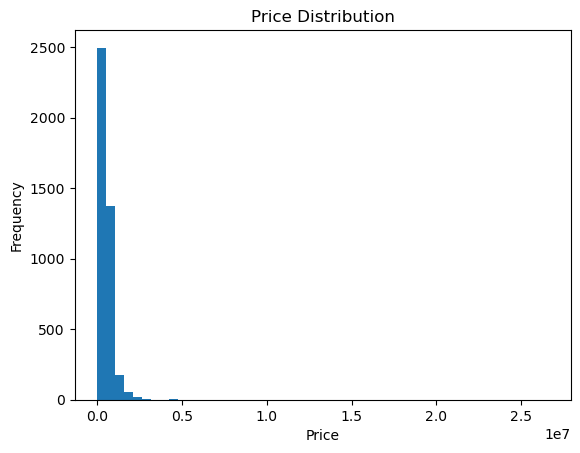

In [13]:
# Plotting the column price
plt.hist(df['price'], bins=50)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

Removing extreme outliers in the column price so as to avoid the outliers to dominate the model yielding to the explosion of the MSE

In [14]:
df = df[df['price'] < df['price'].quantile(0.99)]  # Remove top 1% extreme values


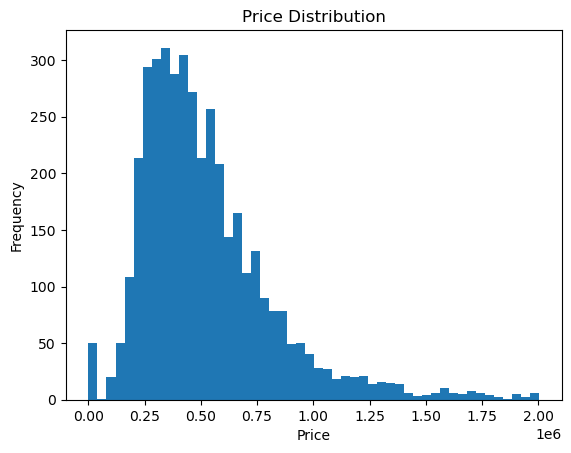

In [15]:
plt.hist(df['price'], bins=50)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

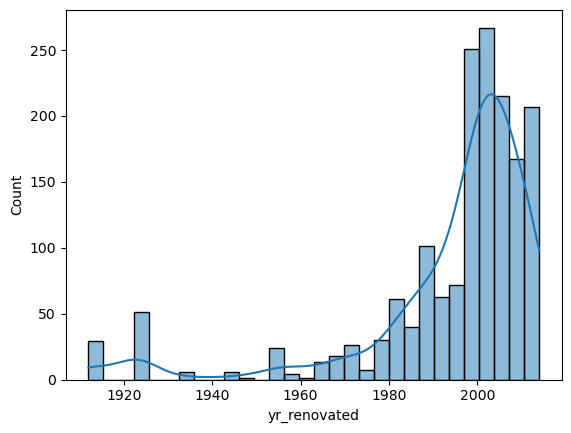

In [16]:
# Filter the column yr_renovated so as to have a proper visualisation

# Filter out unrenovated houses (where yr_renovated == 0)
df_filter = df[df['yr_renovated'] > 0]

# Plot histogram
sns.histplot(data=df_filter, x='yr_renovated', bins=30, kde=True)

# Show the plot
plt.show()

Filtering the yr_renovated column allows us to observe its distribution.

However, houses with a renovation year of 0 present a potential issue and should be handled appropriately

# Dataset distribution using histogram, boxplot and count plot

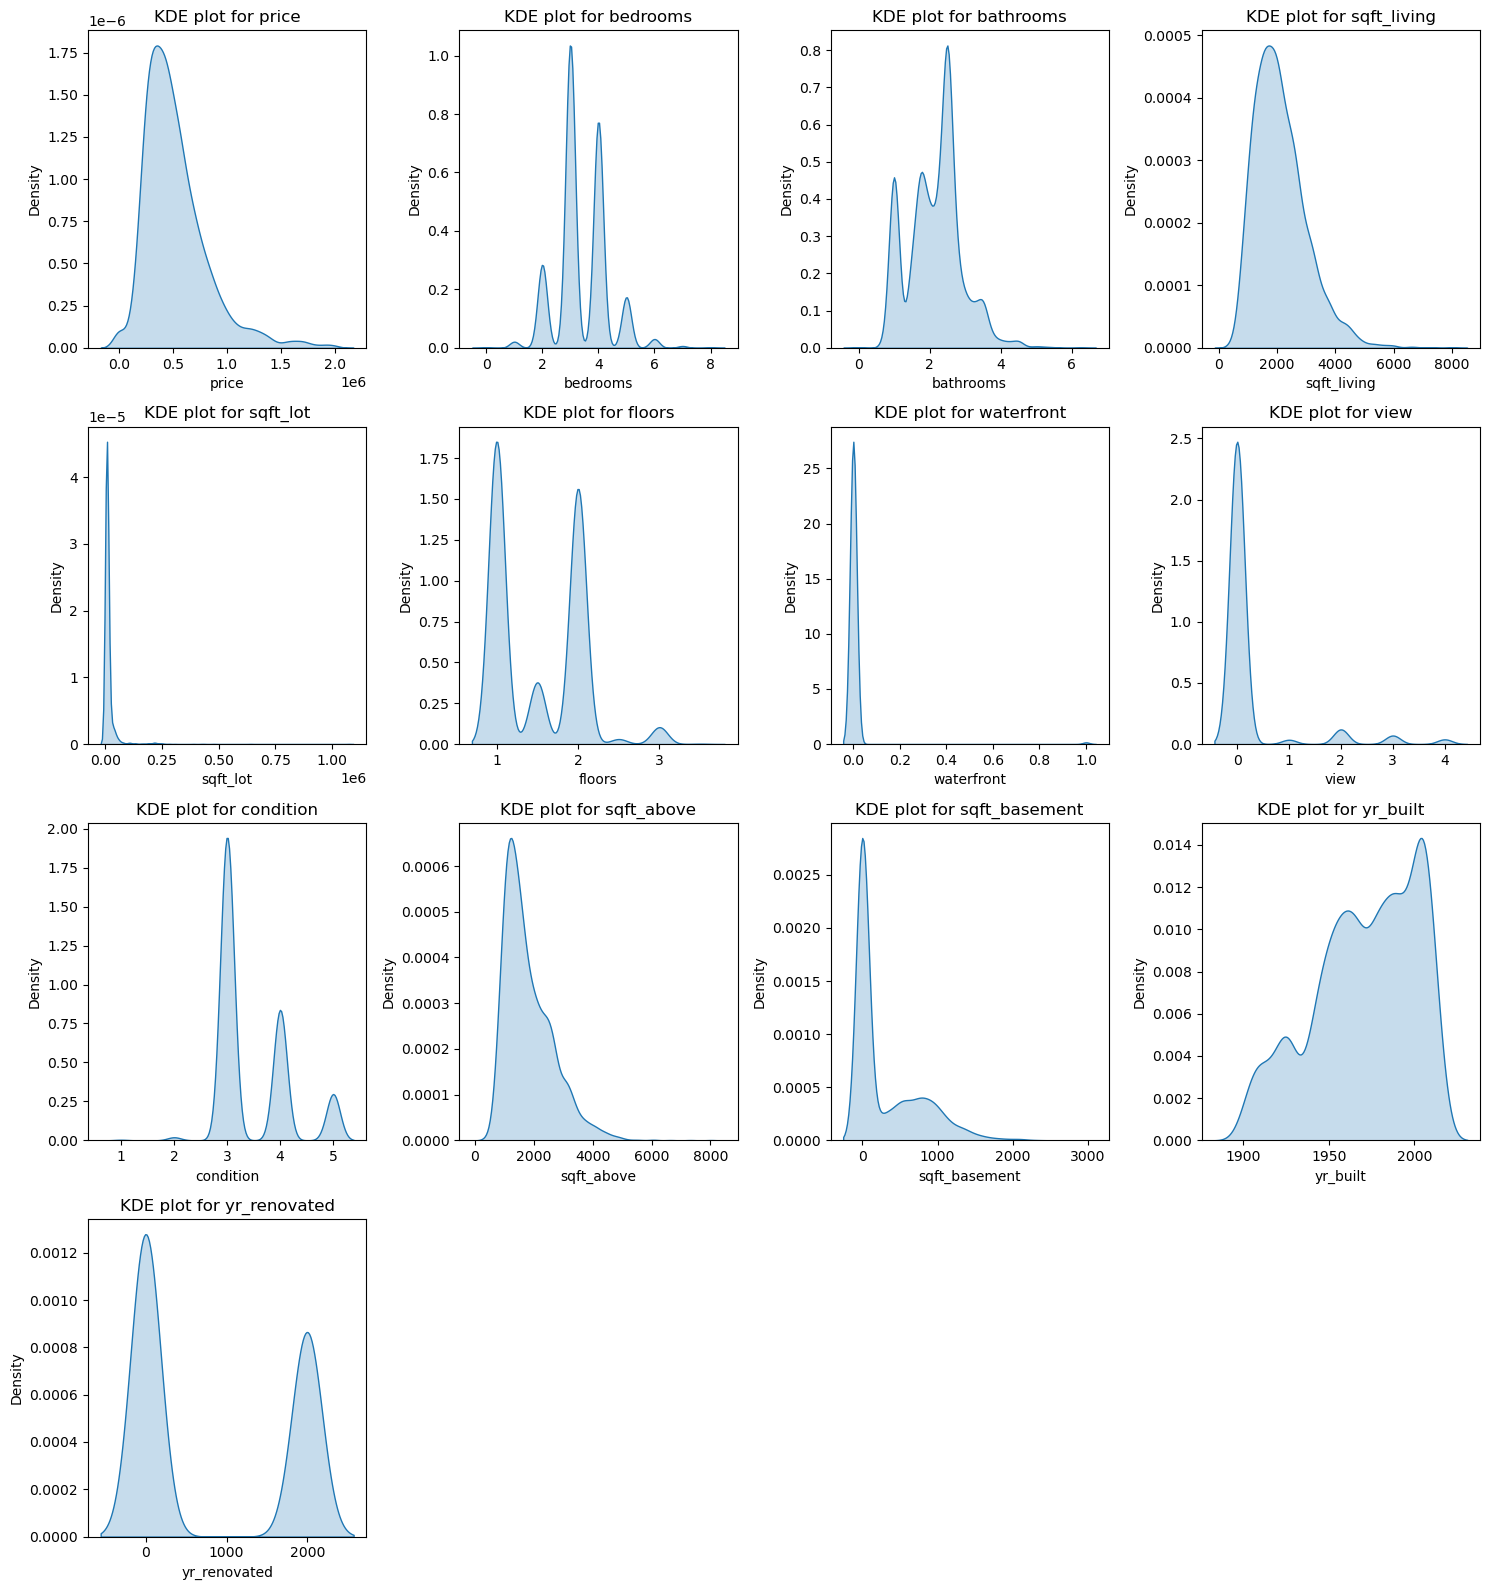

In [17]:
#Histogram visualisation for numerical varibles

# actualizing numerical columns record
num_columns = df.describe().columns.to_list() 

num_features = len(num_columns)

rows = int(np.ceil(num_features / 4))  
cols = min(num_features, 4)  

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten() 

for i, num_feature in enumerate(num_columns):
    sns.kdeplot(df[num_feature], ax=axes[i], fill=True)
    axes[i].set_title(f"KDE plot for {num_feature}")

for j in range(i + 1, len(axes)):  
    fig.delaxes(axes[j]) 
    
plt.tight_layout()
plt.show()

Observation:

We can observe that some variables approximately have the normal distribution, the difference is that they are skewed. We have the variable price, sqft_living and sqft_lot.

Also, variables like yr_renovated, condition, view, waterfront, floors and bedrooms are successions of normal distribtions.

Then, the other variables follow another type of distribution.

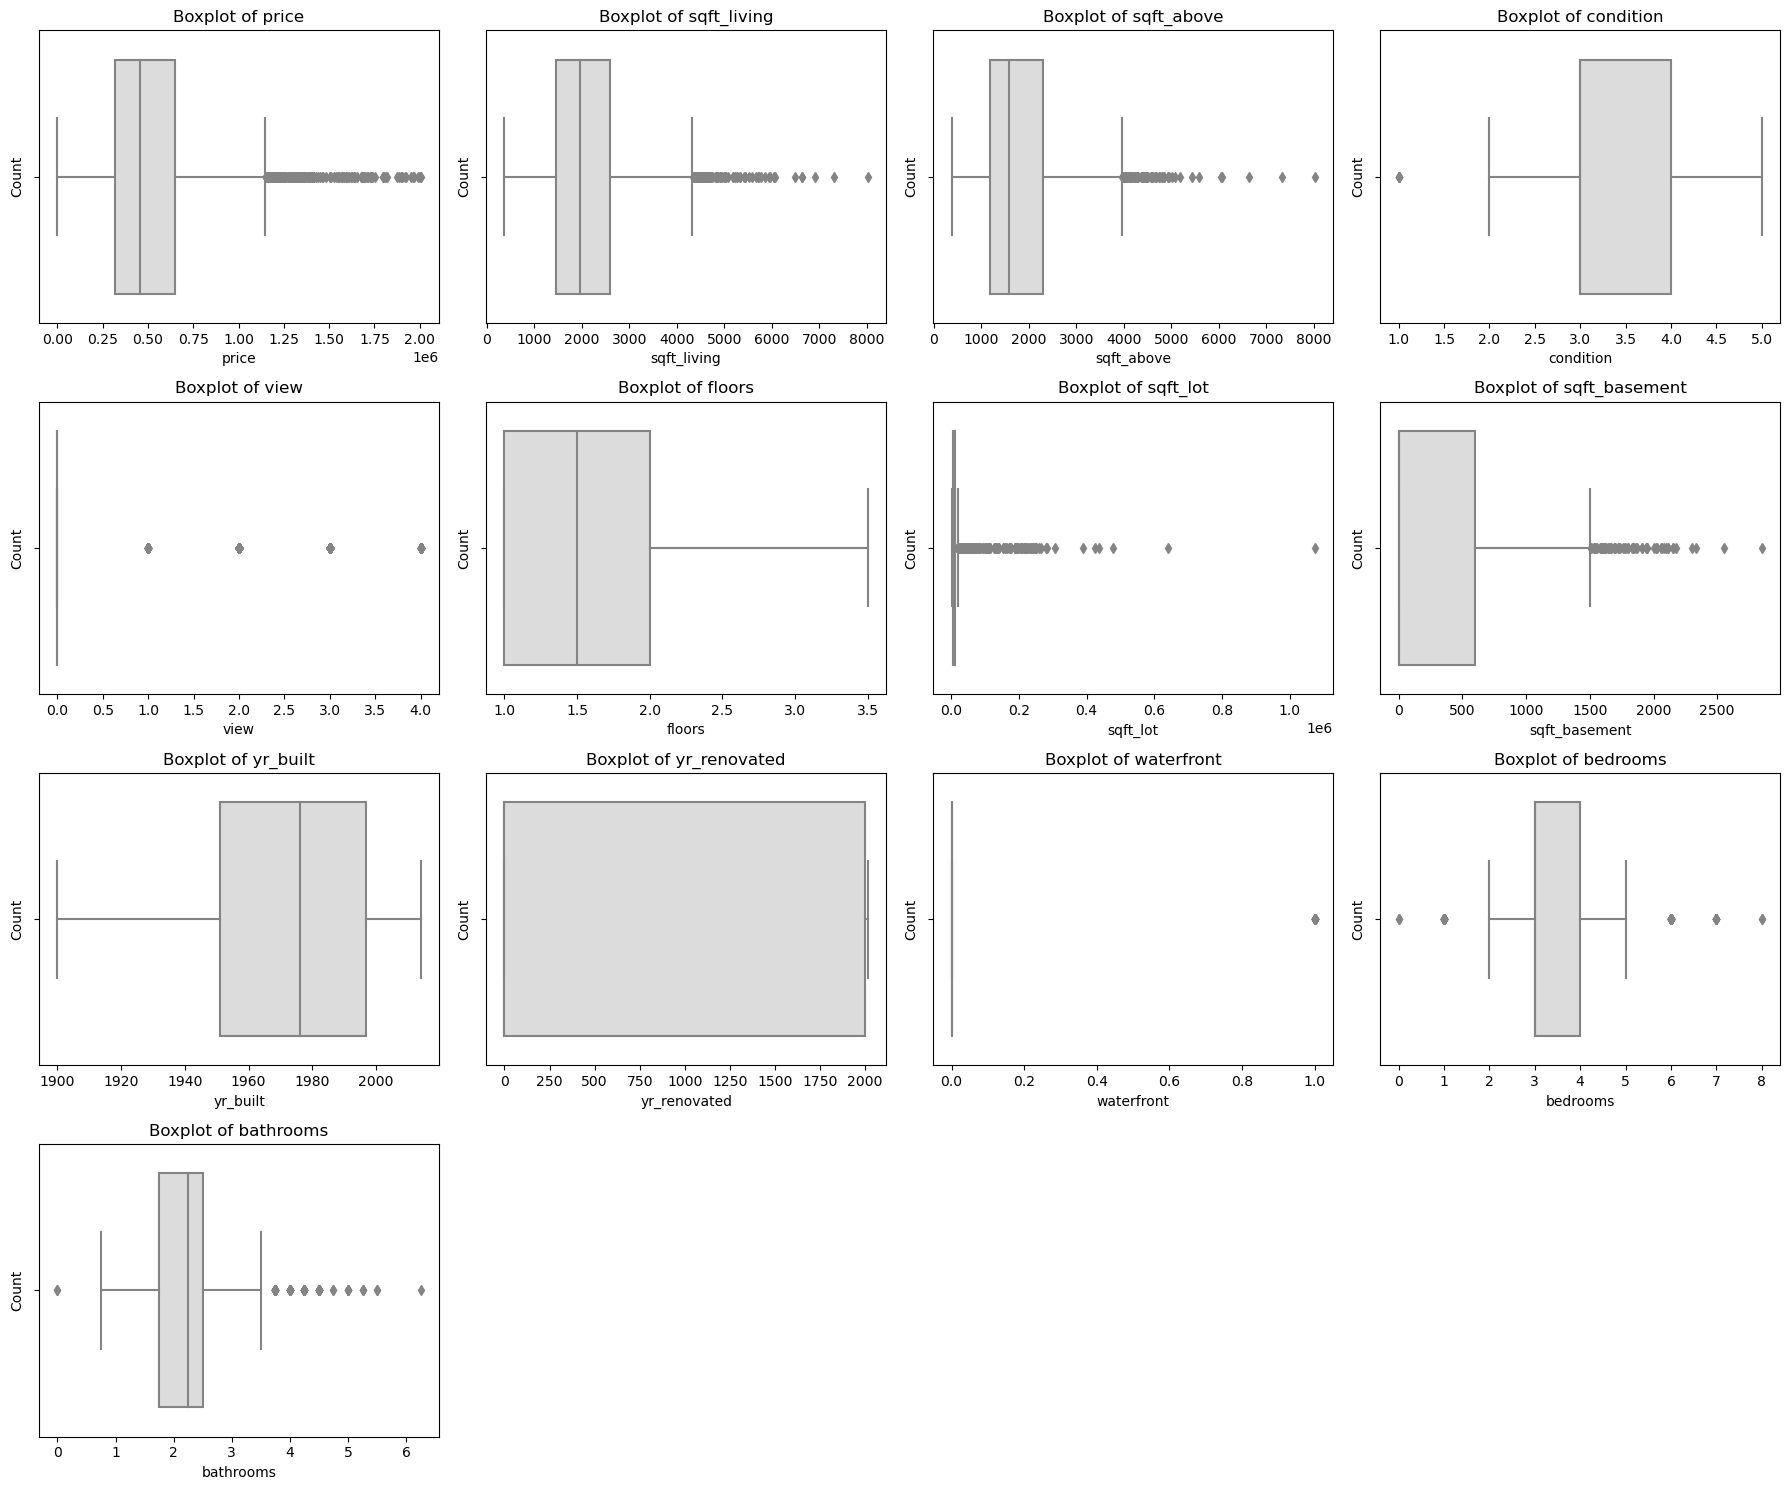

In [18]:
#Boxplot visualisation for numerical varibles

# Select numerical columns to visualize
columns_to_plot = ['price', 'sqft_living', 'sqft_above', 'condition','view', 'floors',
                   'sqft_lot', 'sqft_basement', 'yr_built', 'yr_renovated','waterfront',
                   'bedrooms', 'bathrooms']
  
# Set the figure size
plt.figure(figsize=(18, 15))

# Define grid size (3 rows, 3 columns)
rows = 4
cols = 4

# Loop through selected columns and plot countplots
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(rows, cols, i)  # Create a 2-row, 3-column grid
    sns.boxplot(x=df[col], palette='coolwarm')  # Correct countplot usage
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Observations:

We can observe that some varaibles (like price, sqft_living) have multiples outliers.

Normalisation will be done using different methods such as robust normalisation, z-normalisation

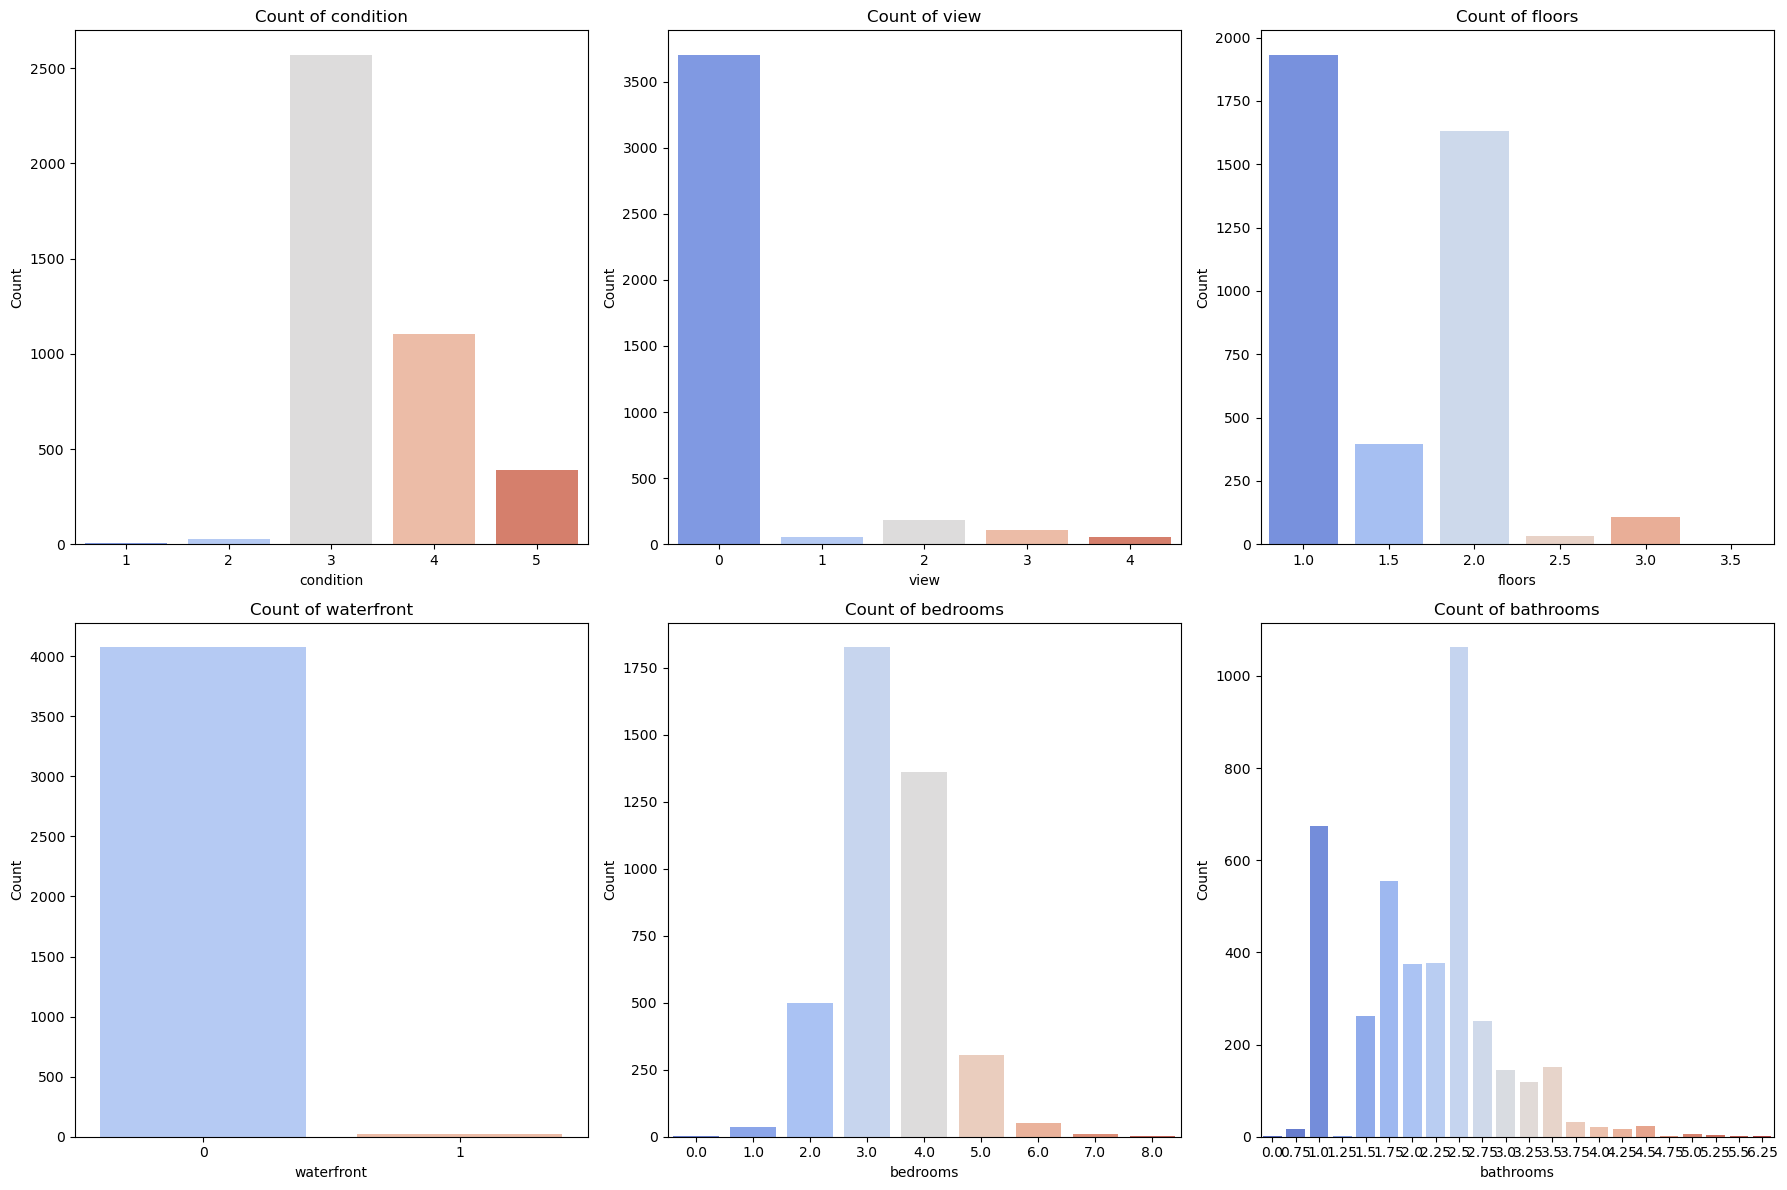

In [19]:
#Count plot visualisation for categorical variables

#List of discrete variables to visualize
columns_to_plot = ['condition', 'view', 'floors', 'waterfront', 'bedrooms', 'bathrooms']

# Define grid size (2 rows, 3 columns)
rows = 2
cols = 3

# Set figure size
plt.figure(figsize=(18, 12))

# Loop through selected columns and plot countplots
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(rows, cols, i)  # Create a 2-row, 3-column grid
    sns.countplot(x=df[col], palette='coolwarm')  # Correct countplot usage
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


From the above count plot we can see that few houses have poor property condition.

The majority of the houses doesnot have a waterfront and view.




# Bar charts visualisations for categorical according to price

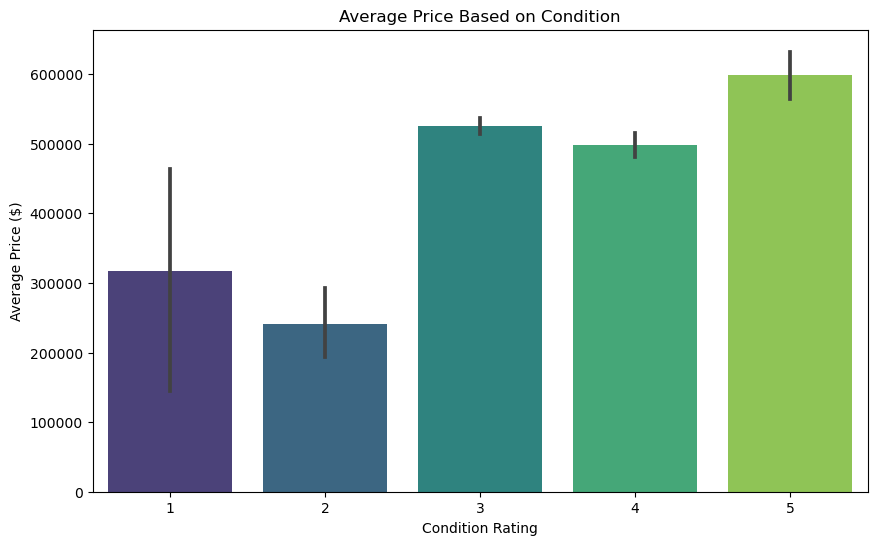

In [20]:
plt.figure(figsize=(10, 6))  # Set figure size

sns.barplot(
    x="condition",
    y="price",
    data=df,
    estimator=lambda x: x.mean(),#Ensure it plots the mean price
    palette="viridis"  # Optional: adds color styling
)

plt.title("Average Price Based on Condition")  # Move title outside sns.barplot()
plt.xlabel("Condition Rating")
plt.ylabel("Average Price ($)")
plt.show()

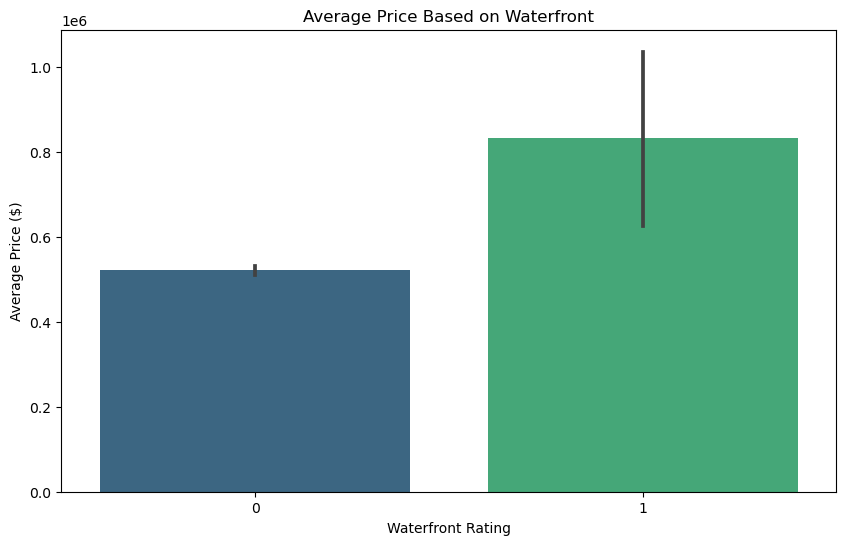

In [21]:
plt.figure(figsize=(10, 6))  # Set figure size

sns.barplot(
    x="waterfront",
    y="price",
    data=df,
    estimator=lambda x: x.mean(),#Ensure it plots the mean price
    palette="viridis"  # Optional: adds color styling
)

plt.title("Average Price Based on Waterfront")  # Move title outside sns.barplot()
plt.xlabel("Waterfront Rating")
plt.ylabel("Average Price ($)")
plt.show()

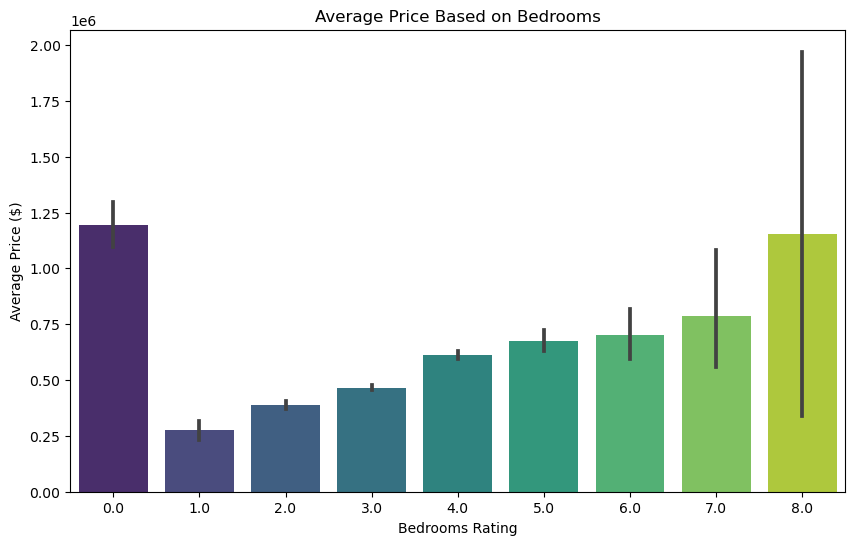

In [22]:
plt.figure(figsize=(10, 6))  # Set figure size

sns.barplot(
    x="bedrooms",
    y="price",
    data=df,
    estimator=lambda x: x.mean(),#Ensure it plots the mean price
    palette="viridis"  # Optional: adds color styling
)

plt.title("Average Price Based on Bedrooms")  # Move title outside sns.barplot()
plt.xlabel("Bedrooms Rating")
plt.ylabel("Average Price ($)")
plt.show()

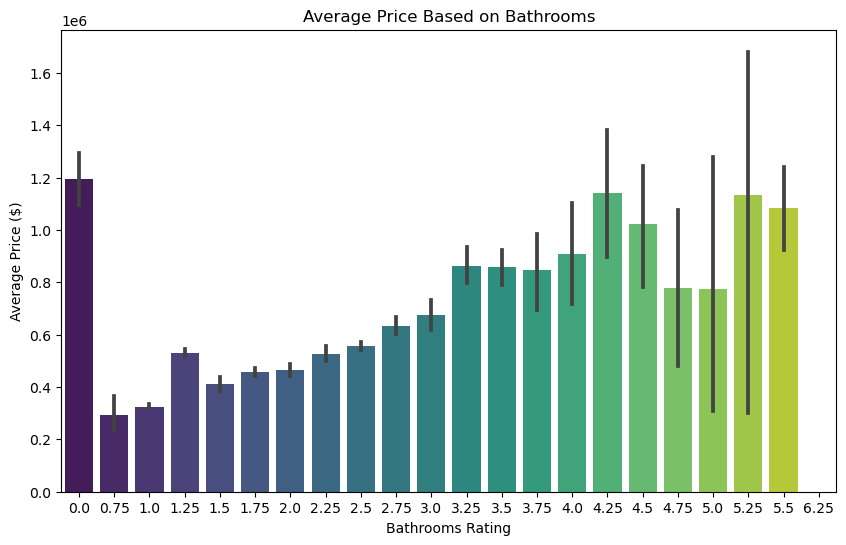

In [23]:
plt.figure(figsize=(10, 6))  # Set figure size

sns.barplot(
    x="bathrooms",
    y="price",
    data=df,
    estimator=lambda x: x.mean(),  # Ensure it plots the mean price
    palette="viridis"  # Optional: adds color styling
)

plt.title("Average Price Based on Bathrooms")  # Move title outside sns.barplot()
plt.xlabel("Bathrooms Rating")
plt.ylabel("Average Price ($)")
plt.show()

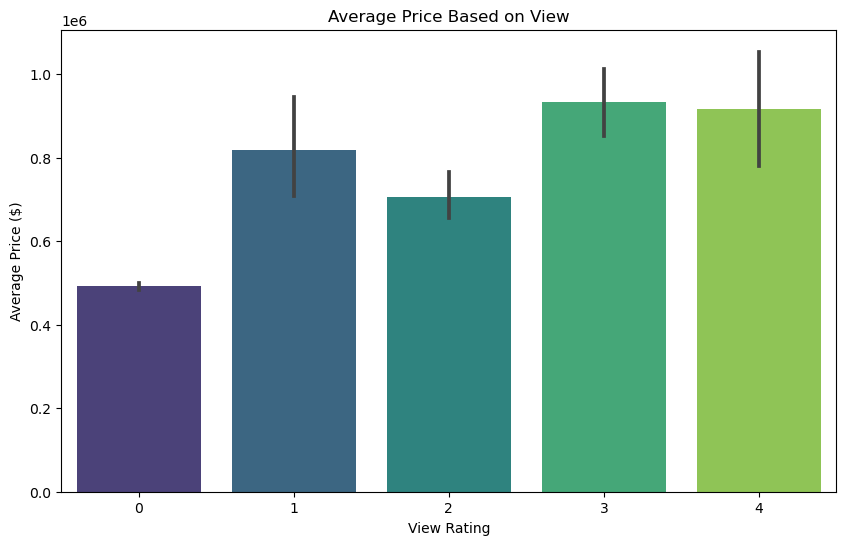

In [24]:
plt.figure(figsize=(10, 6))  # Set figure size

sns.barplot(
    x="view",
    y="price",
    data=df,
    estimator=lambda x: x.mean(),  # Ensure it plots the mean price
    palette="viridis"  # Optional: adds color styling
)

plt.title("Average Price Based on View")  # Move title outside sns.barplot()
plt.xlabel("View Rating")
plt.ylabel("Average Price ($)")
plt.show()

The aim of these graphs is is to observe if the variable price depends on these housing features.

We can see that the highest columns for the variables condition, waterfront and view have the highest house prices.

# Scatterplot matrix

A scatterplot matrix is an effective way to visualize pairwise relationships and correlations among selected features. It provides a quick overview of data distribution, highlighting potential patterns, trends, and outliers

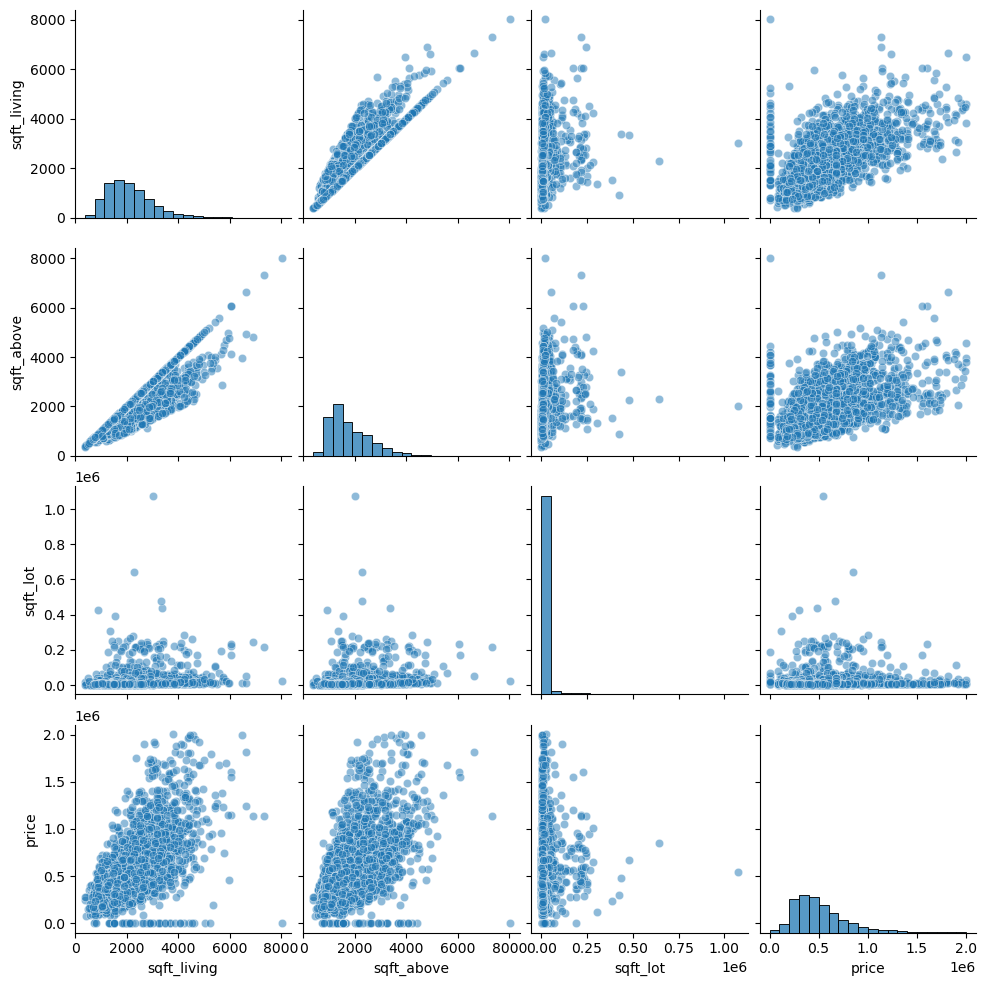

In [25]:
sns.pairplot(df[['sqft_living', 'sqft_above', 'sqft_lot', 'price']],
    plot_kws={'alpha': 0.5},
     diag_kws={'bins': 20}) 
plt.show()

The strong correlation between sqft_living and sqft_above suggests that most living space is above ground.


In [26]:
# Converting the column data to datetime
df['date'] = pd.to_datetime(df['date'])

# Creating a copy of the dataset
df1 = df.copy()

# Creating new time variables from the column date 
df1['year'] = df['date'].dt.year
df1['month-year'] = df['date'].dt.strftime('%Y-%m')
df1['day'] = df['date'].dt.day
df1['day_of_week'] = df['date'].dt.dayofweek  
df1['quarter'] = df['date'].dt.quarter


# Correlation matrix

<Figure size 640x480 with 0 Axes>

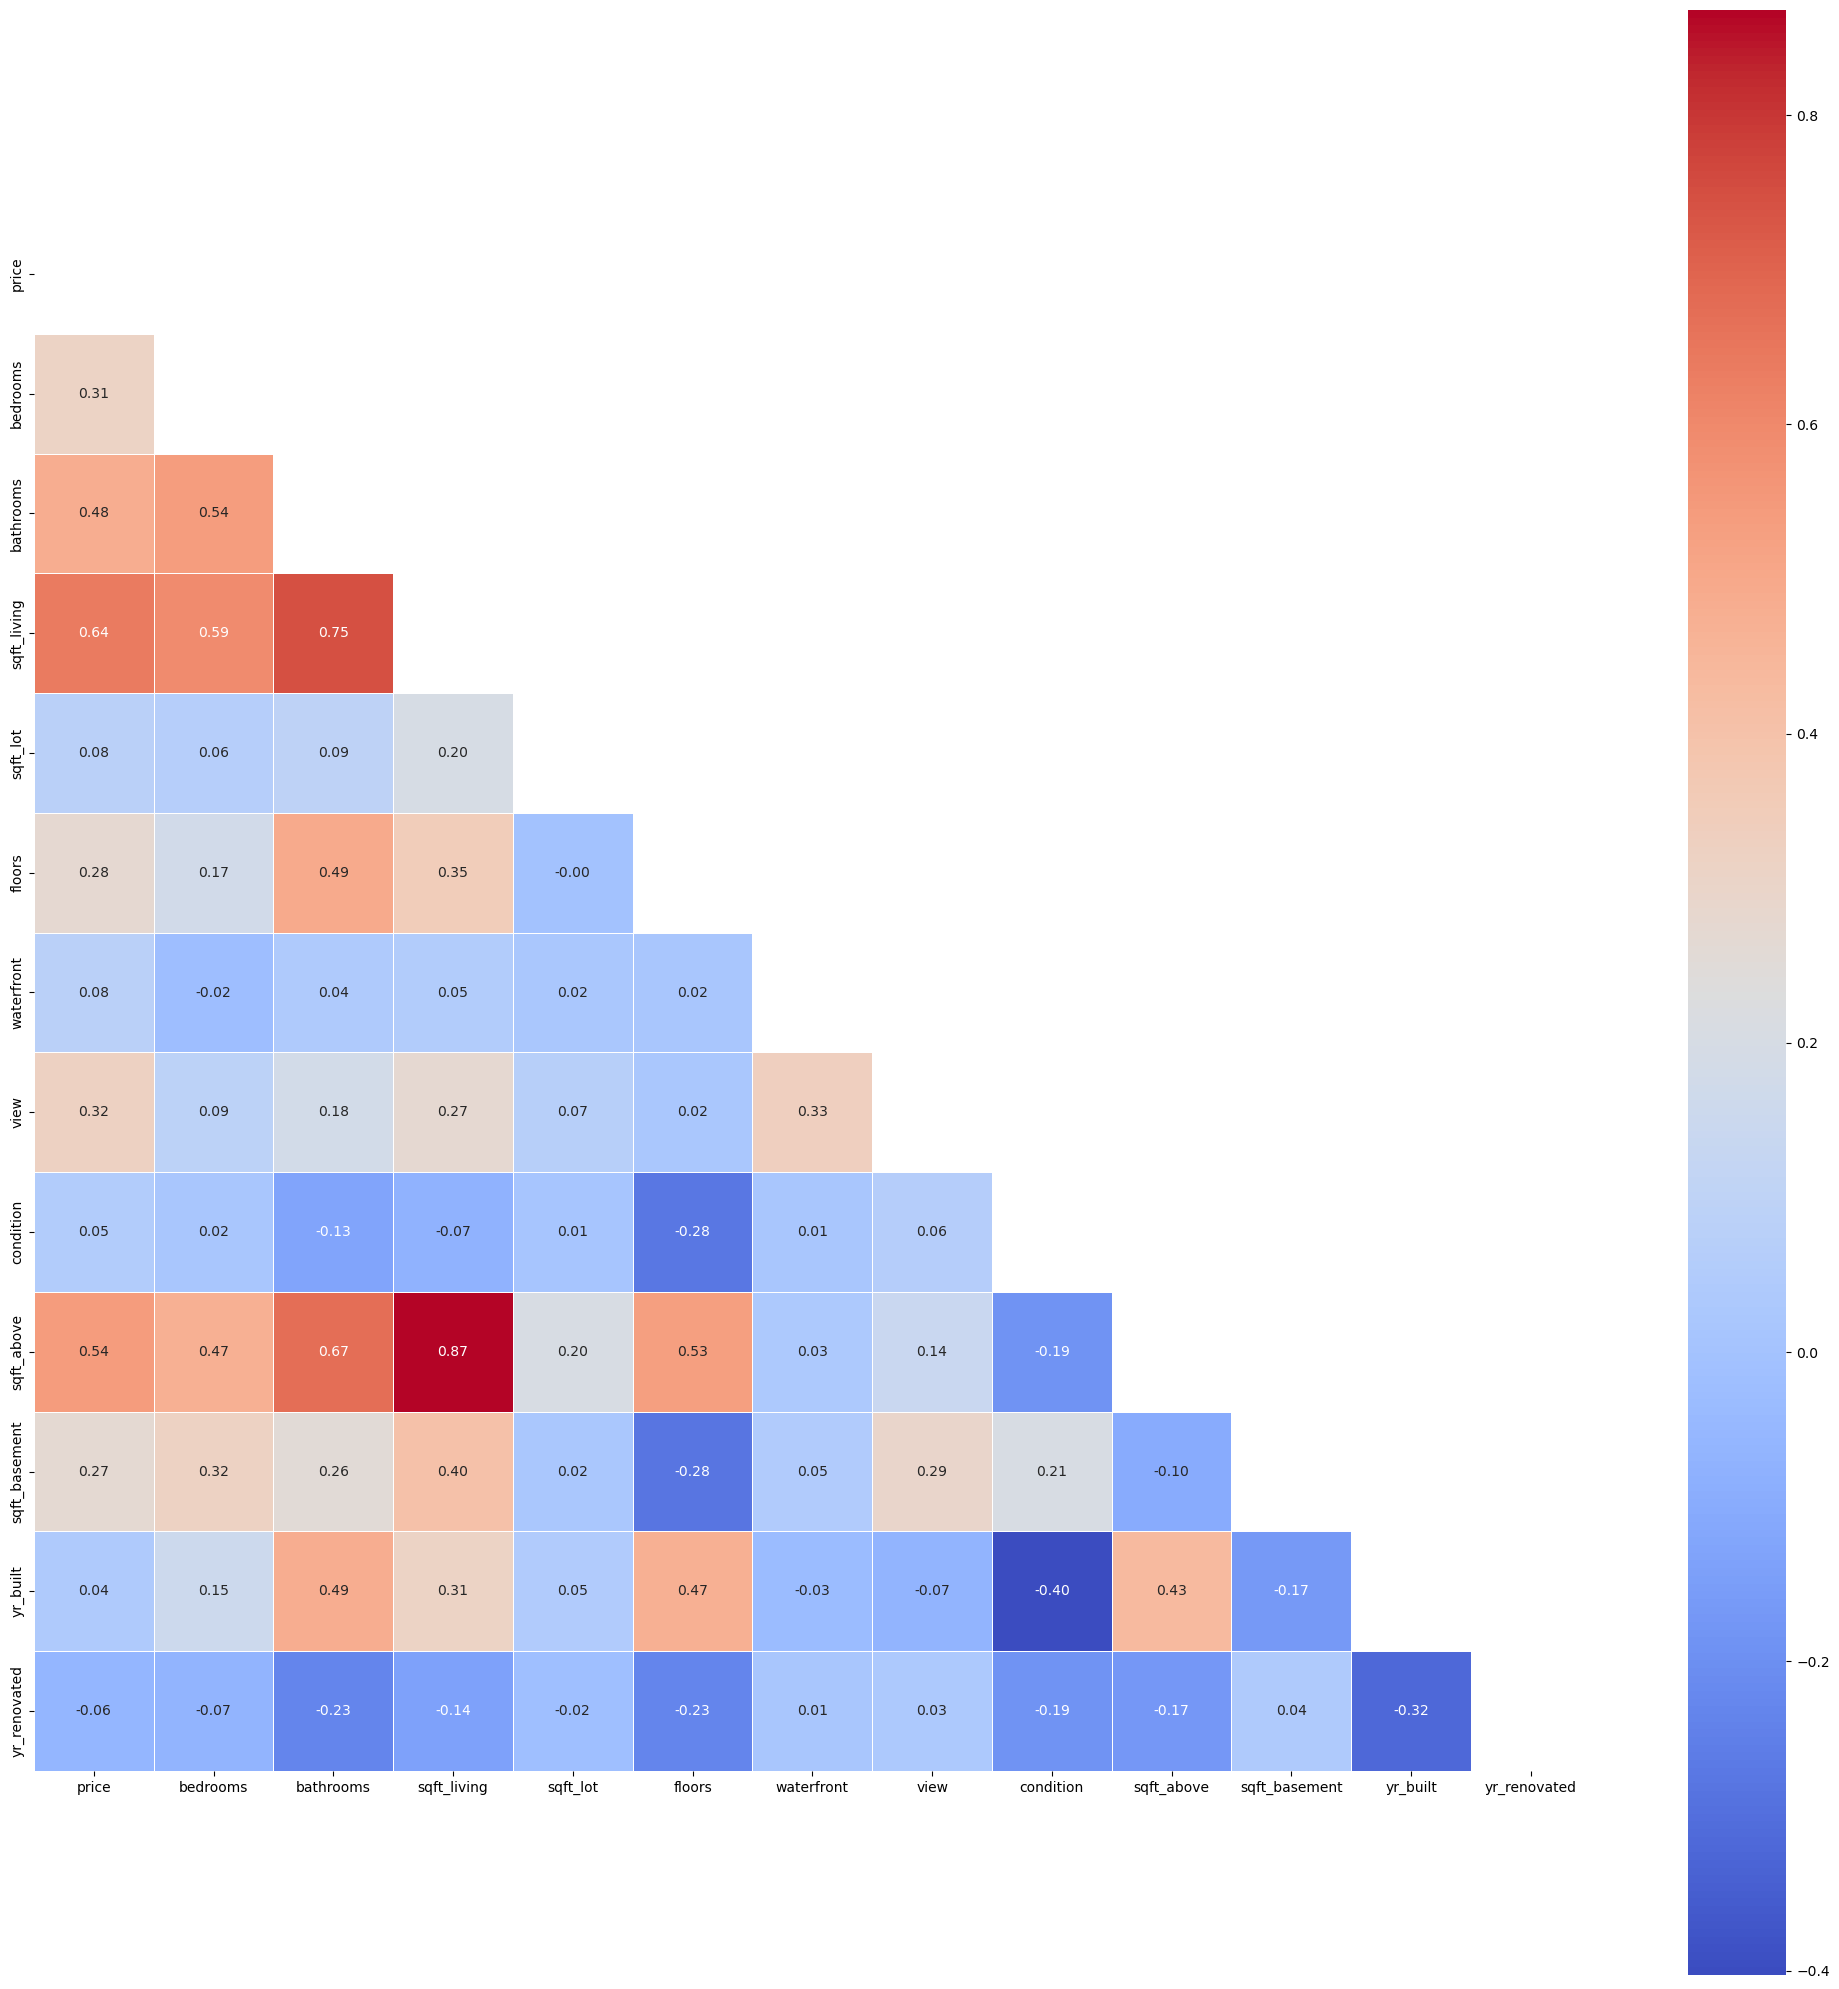

<Figure size 640x480 with 0 Axes>

In [27]:
# Computing the correlation matrix just for numerical features here. 
corr_matrix = df[num_columns].corr()

# Visualization of the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, 
            annot=True,         # Show correlation values
            fmt=".2f",          # Format numbers (2 decimal places)
            cmap="coolwarm",    # Color map
            linewidths=0.5,     # Line width between cells
            square=True,        # Make it a square matrix
            mask=np.triu(corr_matrix))
plt.tight_layout()
plt.figure()

The feature variables showing the strongest correlation with target variable price are sqft_living(0.64) and sqft_above(0.54)

The suggestion we made for the variable sqft_above and sqft_living concerning their correlation was right. They actually have a correlation of 0.84

# Summing the number of houses per city

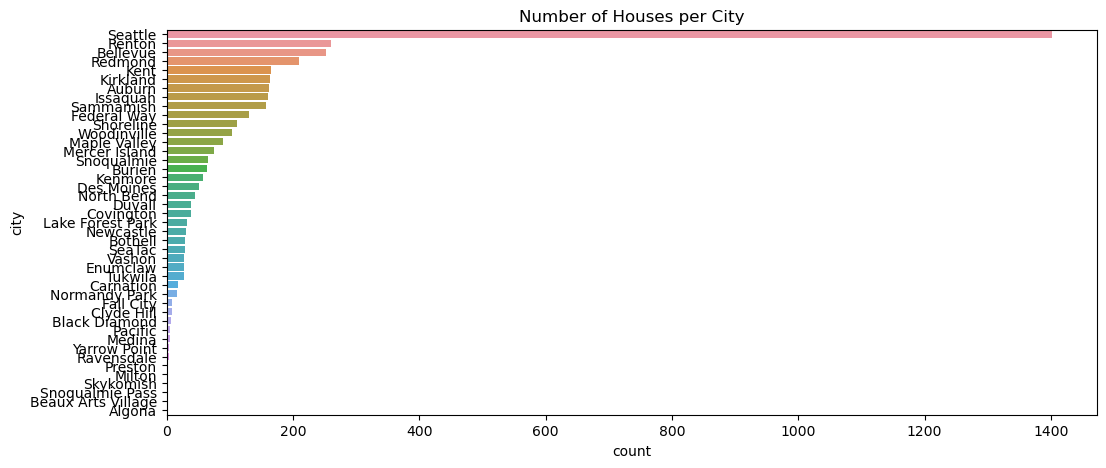

In [28]:
plt.figure(figsize=(12,5))
sns.countplot(y=df1['city'], order=df['city'].value_counts().index)
plt.title("Number of Houses per City")
plt.show()

We can obeserve that seattles has the highest number of houses.

# Trend of Average House Prices from May to July 2014

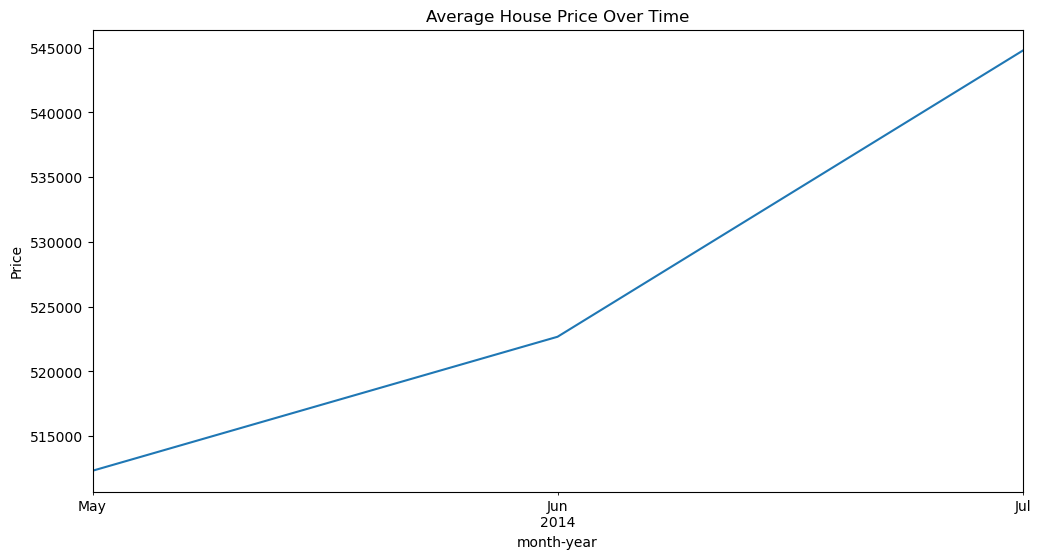

In [29]:
df1['month-year'] = pd.to_datetime(df1['month-year'])  
df1.set_index('month-year').resample('M')['price'].mean().plot(figsize=(12,6))
plt.title("Average House Price Over Time")
plt.ylabel("Price")
plt.show()

The average house price started at a lower value in May 2014 and gradually increased in June 2014.Then a more significant rise occurred in July 2014.

This indicates a possible upward trend in the housing market during this period.

Various factors, such as market demand, seasonality, economic conditions, or real estate policies, could have influenced this price increase.

# Price Trends by Year Built

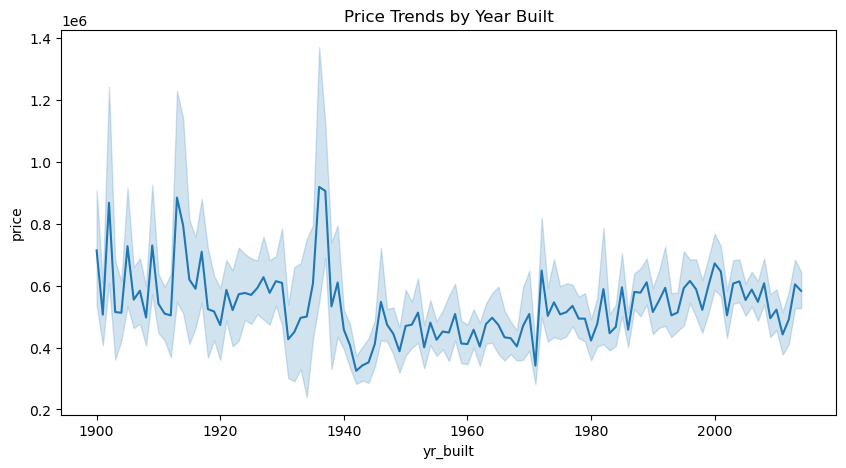

In [30]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df1['yr_built'], y=df1['price'])
plt.title("Price Trends by Year Built")
plt.show()

Older homes built before 1940 exhibited significant price variability, likely influenced by historical economic events such as the Great Depression.The fluctuation in prices during this period suggests that fewer homes were built, and their values varied based on market conditions. 

In contrast, mid-century homes constructed between 1940 and 1980 had lower and more stable prices, possibly due to the post-war construction boom, standardized housing developments, and a focus on affordability. 

However, modern homes built from 1980 to the present tend to be more expensive, driven by increasing demand, rising construction costs, and broader economic factors shaping the real estate market.

 # 4. DATA PREPARATION

In [31]:
# Creating a new dataset copy
data = df.copy()
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09,376000.000000,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09,800000.000000,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
3,2014-05-09,324000.000000,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10,549900.000000,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
5,2014-05-10,320000.000000,3.0,2.50,2130,6969,2.0,0,0,3,2130,0,2003,0,Cedar to Green River Trail,Maple Valley,WA 98038,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,2014-07-09,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4136,2014-07-09,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4137,2014-07-09,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4138,2014-07-10,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [32]:
# Concise summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4098 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4098 non-null   datetime64[ns]
 1   price          4098 non-null   float64       
 2   bedrooms       4098 non-null   float64       
 3   bathrooms      4098 non-null   float64       
 4   sqft_living    4098 non-null   int64         
 5   sqft_lot       4098 non-null   int64         
 6   floors         4098 non-null   float64       
 7   waterfront     4098 non-null   int64         
 8   view           4098 non-null   int64         
 9   condition      4098 non-null   int64         
 10  sqft_above     4098 non-null   int64         
 11  sqft_basement  4098 non-null   int64         
 12  yr_built       4098 non-null   int64         
 13  yr_renovated   4098 non-null   int64         
 14  street         4098 non-null   object        
 15  city           4098 n

In [33]:
# Converting date time for the date column into time stamp
data['date'] = data['date'].astype(str)

In [34]:
data['date'] = pd.to_datetime(data['date'])
data['month-year'] = data['date'].dt.strftime('%Y-%m')

In [35]:
# Function to convert a date string (YYYY-MM) to a Unix timestamp

def ymdhms_to_timestamp(value: str) -> int:
    # Parse the string into a datetime object
    dt = datetime.strptime(value, "%Y-%m")
    # Convert the datetime object to a Unix timestamp
    return int(dt.timestamp())

# Function to convert a date column in a DataFrame to Unix timestamps
def convert_date_column_to_timestamp(data: pd.DataFrame, column_name: str) -> pd.DataFrame:
     # Apply the conversion function to each value in the specified column,
     # while handling missing (NaN) values
    data[column_name] = data[column_name].apply(lambda x: ymdhms_to_timestamp(x) if pd.notnull(x) else None)
    return data

# Convert the 'date' column in the DataFrame to timestamps
data = convert_date_column_to_timestamp(data, 'month-year')
data


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,month-year
0,2014-05-09,376000.000000,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA,1398895200
1,2014-05-09,800000.000000,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA,1398895200
3,2014-05-09,324000.000000,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA,1398895200
4,2014-05-10,549900.000000,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA,1398895200
5,2014-05-10,320000.000000,3.0,2.50,2130,6969,2.0,0,0,3,2130,0,2003,0,Cedar to Green River Trail,Maple Valley,WA 98038,USA,1398895200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,2014-07-09,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,1404165600
4136,2014-07-09,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,1404165600
4137,2014-07-09,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,1404165600
4138,2014-07-10,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,1404165600


# Dropping unnecessaries columns and rows

The column country is drop because it contains only one value which doesnot brIng more information to our dataset.
The columns city and date doesnot bring enough information for it to be kept.

In [36]:
# Dropping the columns country and city
data = data.drop(columns=["country","city","date"]) 


Dropping the rows containing zero (0) for the variables price ,bedrooms and bathrooms . Since these rows account for less than 5% of the dataset, their removal is justified.

Also i wanted to have a realistic dataset base on logic and not on possible scenarios.

In [37]:
#Drop rows where price is 0
data = data[data['price'] != 0]


In [38]:
data = data[data['bedrooms'] != 0]


In [39]:
data = data[data['bathrooms'] != 0]


# 4.1. Feature Engineering 

# Creating the variable sqft_basement_ratio

Instead of using sqft_basement directly, the ratio of basement size to total square footage provides a standardized measure of how much of a house's space is below ground. This makes comparisons across houses more consistent and informative.

In [40]:
data['sqft_basement_ratio'] = data['sqft_basement'] / data['sqft_living']
# Handle NaN cases if sqft_living is zero
data['sqft_basement_ratio'].fillna(0, inplace=True)  

# Drop the original columns
data.drop(columns=['sqft_basement', 'sqft_living'], inplace=True)


# Creating the variable yr_diff

Calculating the difference between yr_renovated and yr_built helps reduce the gap between 1920 and 0, making the model more effective.

In [41]:
# Replace 0 values in 'yr_renovated' with the corresponding values from 'yr_built'
data.loc[data['yr_renovated'] == 0, 'yr_renovated'] = data['yr_built']

# Create a new column representing the difference between renovation year and built year
data['yr_diff'] = data['yr_renovated'] - data['yr_built']

# Ensure that replaced values result in a difference of zero
data.loc[data['yr_diff'].isna(), 'yr_diff'] = 0  # Handle missing values if any
data.loc[data['yr_renovated'] == data['yr_built'], 'yr_diff'] = 0

# Drop the original columns
data.drop(columns=['yr_renovated', 'yr_built'], inplace=True)


In [42]:
data

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,street,statezip,month-year,sqft_basement_ratio,yr_diff
0,376000.000000,3.0,2.00,1384,3.0,0,0,3,1340,9245-9249 Fremont Ave N,WA 98103,1398895200,0.000000,0
1,800000.000000,4.0,3.25,159430,2.0,0,0,3,3540,33001 NE 24th St,WA 98014,1398895200,0.000000,0
3,324000.000000,3.0,2.25,904,2.0,0,0,3,798,820 NW 95th St,WA 98117,1398895200,0.200401,0
4,549900.000000,5.0,2.75,7015,1.0,0,0,5,1600,10834 31st Ave SW,WA 98146,1398895200,0.477124,0
5,320000.000000,3.0,2.50,6969,2.0,0,0,3,2130,Cedar to Green River Trail,WA 98038,1398895200,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,308166.666667,3.0,1.75,6360,1.0,0,0,4,1510,501 N 143rd St,WA 98133,1404165600,0.000000,25
4136,534333.333333,3.0,2.50,7573,2.0,0,0,3,1460,14855 SE 10th Pl,WA 98007,1404165600,0.000000,26
4137,416904.166667,3.0,2.50,7014,2.0,0,0,3,3010,759 Ilwaco Pl NE,WA 98059,1404165600,0.000000,0
4138,203400.000000,4.0,2.00,6630,1.0,0,0,3,1070,5148 S Creston St,WA 98178,1404165600,0.488038,0


# 4.2. Dataset splitting

Splitting the dataset before carrying one hot encoding and frequency encoding so as to avoid data leakage

In [101]:
# Data split

X = data.drop(columns=['price'])  
y = data['price']                 

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
) # 20% as test size because we have enough data

# 4.3. Encoding categorical variables 

In [102]:
# Frequency Encoding
for col in ['statezip', 'street']:
    freq_enc = X_train[col].value_counts(normalize=True).to_dict()
    X_train[col + '_freq'] = X_train[col].map(freq_enc)
    X_test[col + '_freq'] = X_test[col].map(freq_enc).fillna(0)  

# One-Hot Encoding
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe_cols = ['statezip', 'street']

train_ohe = ohe.fit_transform(X_train[ohe_cols])
test_ohe = ohe.transform(X_test[ohe_cols])

# Convert One-Hot to DataFrame
train_ohe_df = pd.DataFrame(train_ohe, columns=ohe.get_feature_names_out(ohe_cols), index=X_train.index)
test_ohe_df = pd.DataFrame(test_ohe, columns=ohe.get_feature_names_out(ohe_cols), index=X_test.index)

# Drop original categorical columns
X_train = X_train.drop(columns=ohe_cols)
X_test = X_test.drop(columns=ohe_cols)

# Merge one-hot encoded data
X_train = pd.concat([X_train, train_ohe_df], axis=1)
X_test = pd.concat([X_test, test_ohe_df], axis=1)

# Multiply Frequency Encoding with One-Hot Encoding
for col in ['statezip', 'street']:
    freq_col = col + '_freq'
    ohe_cols = [c for c in train_ohe_df.columns if col in c]  # Get one-hot encoded columns

    for ohe_col in ohe_cols:
        X_train[ohe_col + '_freq_mult'] = X_train[freq_col] * X_train[ohe_col]
        X_test[ohe_col + '_freq_mult'] = X_test[freq_col] * X_test[ohe_col]

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(X_train.head(), "\n")

Train shape: (3237, 6567), Test shape: (810, 6567)
      bedrooms  bathrooms  sqft_lot  floors  waterfront  view  condition  \
2675       3.0       2.00      5000     1.5           0     0          4   
446        2.0       2.25      1240     3.0           0     0          3   
3596       3.0       1.00     10575     1.0           0     0          4   
8          3.0       2.50      1250     3.0           0     0          3   
3151       2.0       1.75      3376     2.0           0     0          3   

      sqft_above  month-year  sqft_basement_ratio  ...  \
2675        1720  1401573600             0.054945  ...   
446         1260  1398895200             0.000000  ...   
3596         910  1404165600             0.000000  ...   
8           1270  1398895200             0.059259  ...   
3151        1910  1401573600             0.000000  ...   

      street_Evergreen Way SE_freq_mult  street_Indian Trail_freq_mult  \
2675                                0.0                            0.

# 4.4. Feature scaling

Visualising numerical variables so as to identify the correct normalisation technique to be used

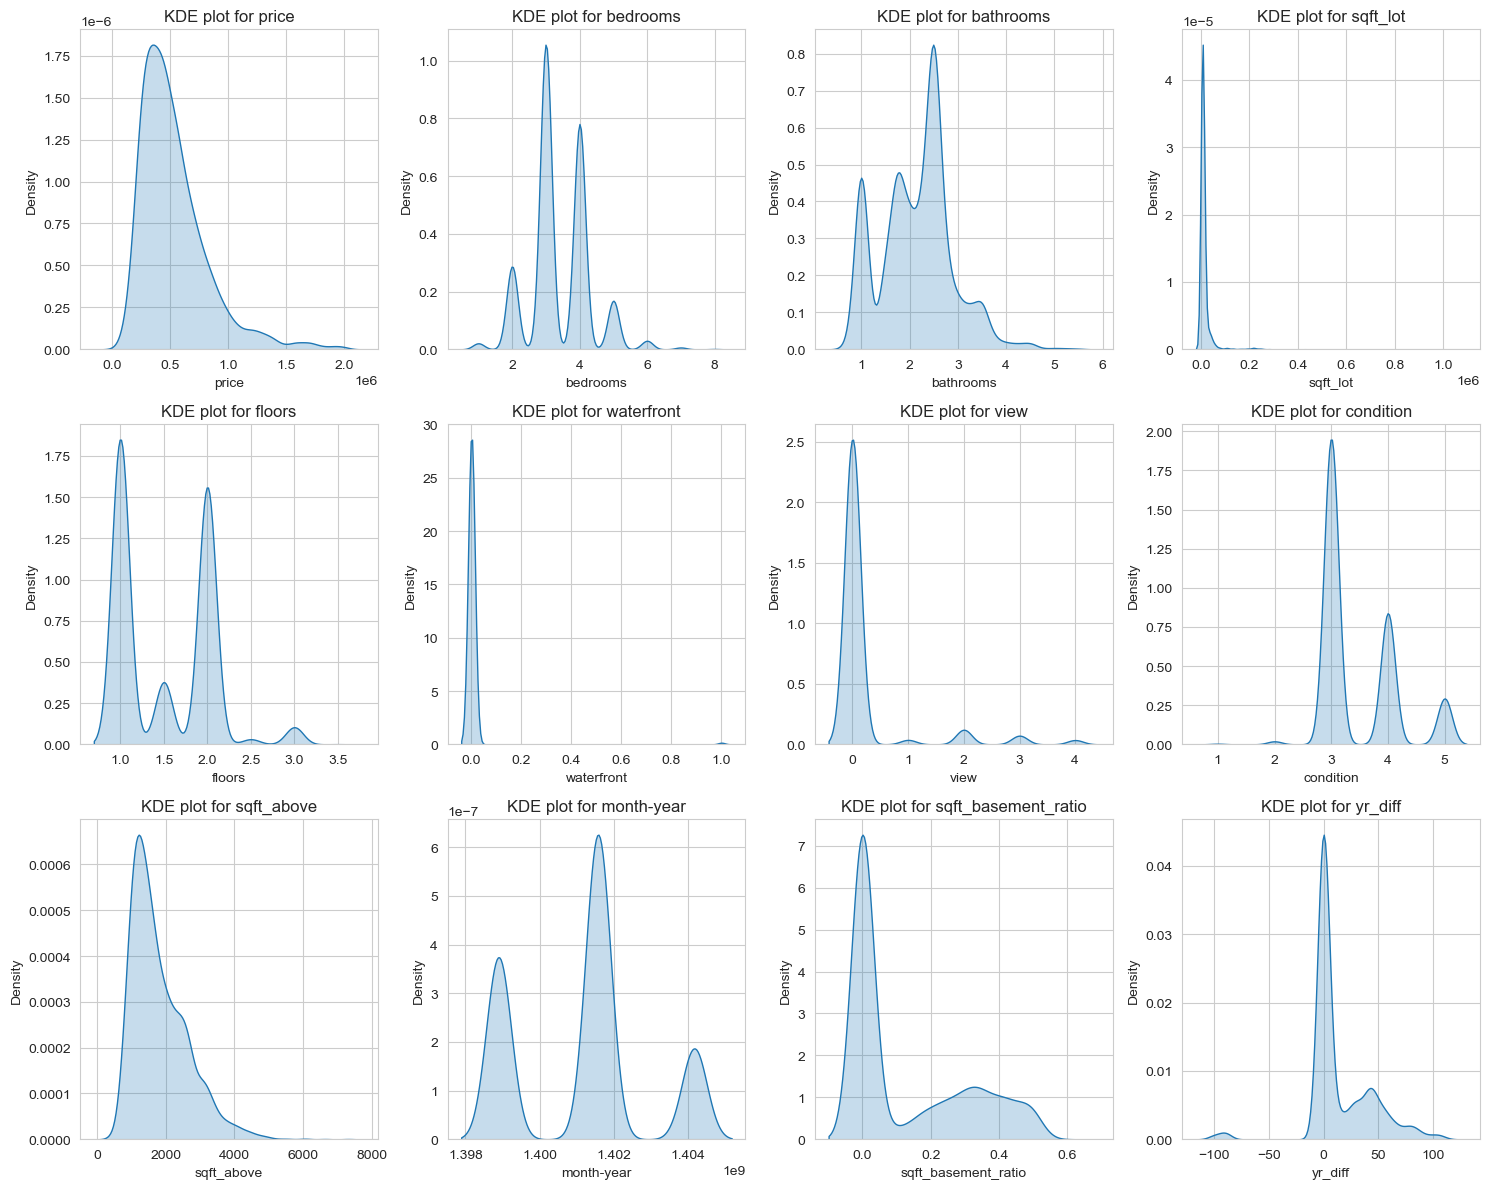

In [103]:
#Histogram visualisation for numerical varibles

# actualizing numerical columns record
num_columns = data.describe().columns.to_list() 

num_features = len(num_columns)

rows = int(np.ceil(num_features / 4))  
cols = min(num_features, 4)  

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten() 

for i, num_feature in enumerate(num_columns):
    sns.kdeplot(data[num_feature], ax=axes[i], fill=True)
    axes[i].set_title(f"KDE plot for {num_feature}")

for j in range(i + 1, len(axes)):  
    fig.delaxes(axes[j]) 
    
plt.tight_layout()
plt.show()

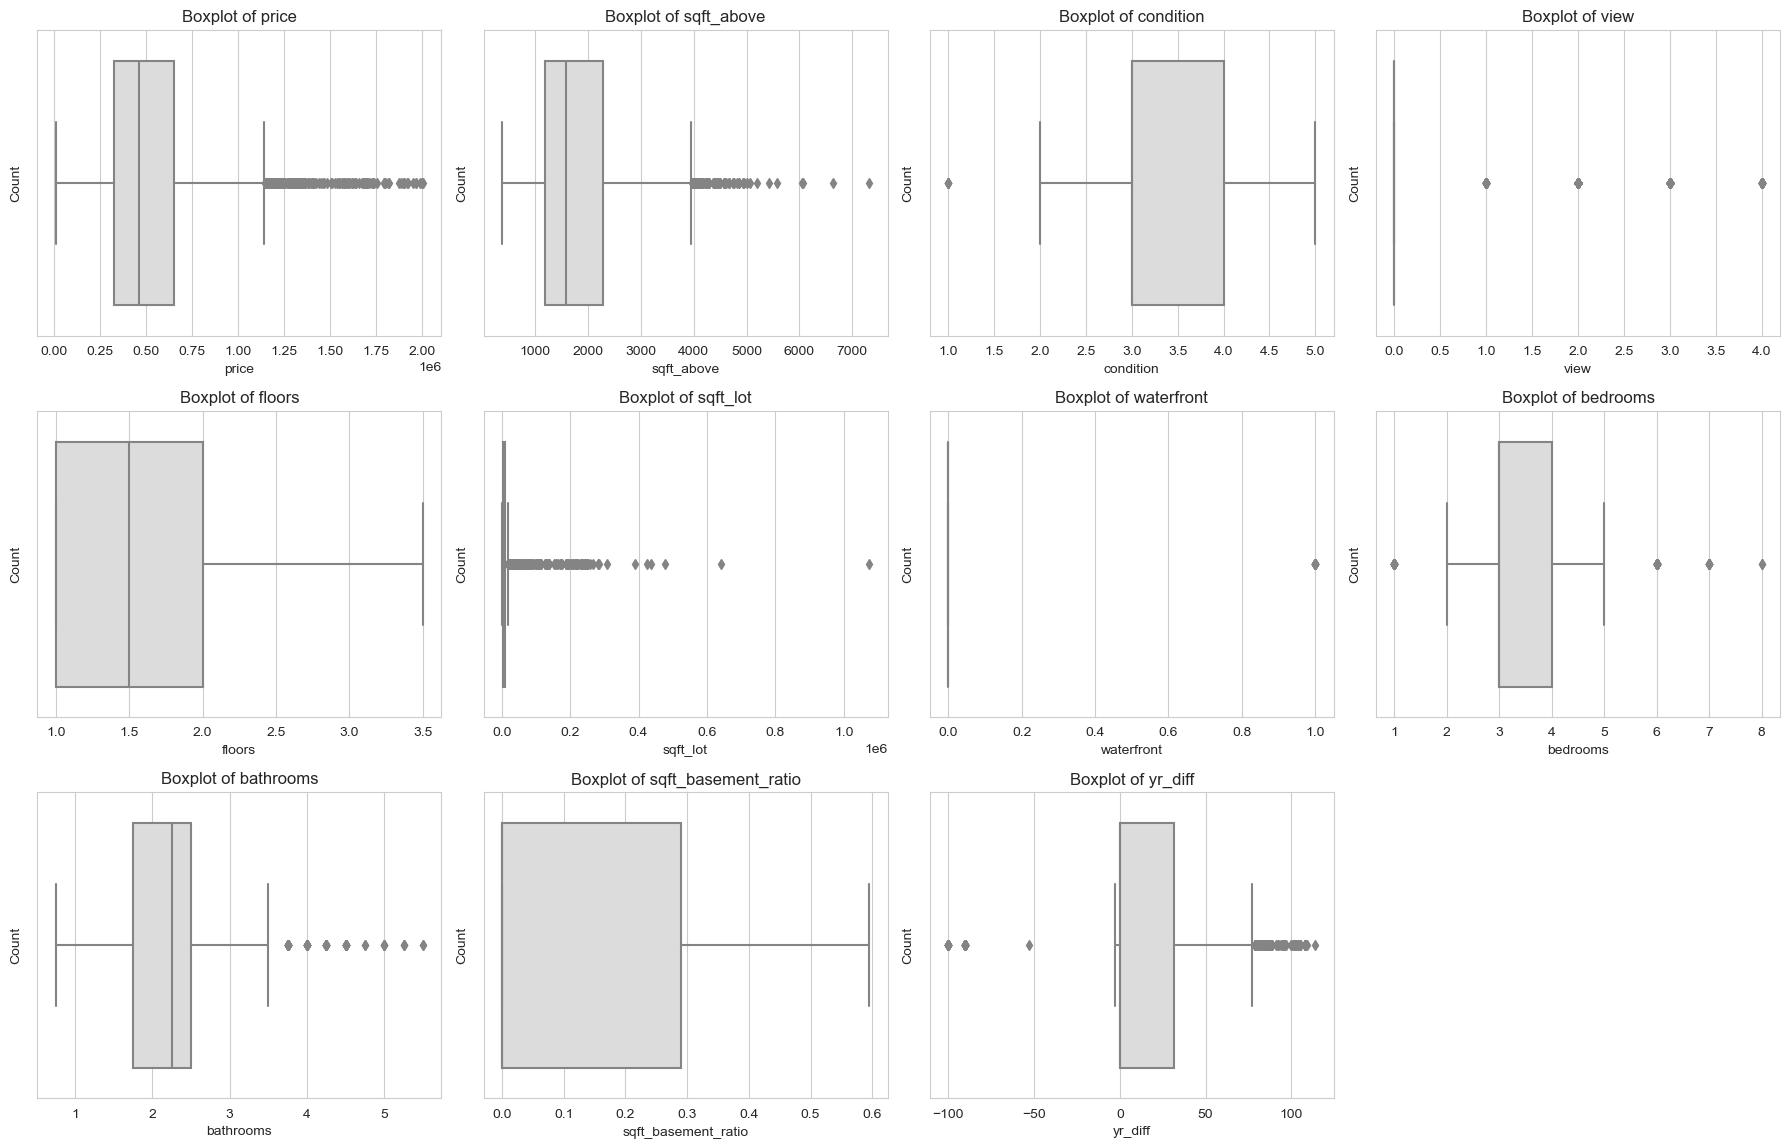

In [104]:
#Boxplot visualisation for numerical varibles

# Select numerical columns to visualize
columns_to_plot = ['price', 'sqft_above', 'condition','view', 'floors',
                   'sqft_lot','waterfront','bedrooms', 'bathrooms',
                   'sqft_basement_ratio','yr_diff']
  
# Set the figure size
plt.figure(figsize=(18, 15))

# Define grid size (3 rows, 3 columns)
rows = 4
cols = 4

# Loop through selected columns and plot countplots
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(rows, cols, i)  # Create a 2-row, 3-column grid
    sns.boxplot(x=data[col], palette='coolwarm')  # Correct countplot usage
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4047 entries, 0 to 4139
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                4047 non-null   float64
 1   bedrooms             4047 non-null   float64
 2   bathrooms            4047 non-null   float64
 3   sqft_lot             4047 non-null   int64  
 4   floors               4047 non-null   float64
 5   waterfront           4047 non-null   int64  
 6   view                 4047 non-null   int64  
 7   condition            4047 non-null   int64  
 8   sqft_above           4047 non-null   int64  
 9   street               4047 non-null   object 
 10  statezip             4047 non-null   object 
 11  month-year           4047 non-null   int64  
 12  sqft_basement_ratio  4047 non-null   float64
 13  yr_diff              4047 non-null   int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 603.3+ KB


The z-score normalization will be apply to the following variables:
    -bedrooms
    -bathrooms
    -yr_diff
    
For the variable price log transformation will be suitable due to its exponential distribution. Also,we decided to apply the log normalization on the variable month-year so as to compress the value while maintaining the differences. 


For the variables sqft_above and sqft_lot robust scaling will be the most appropriate to make those variables much more less 
sensible to outliers.

For the categorical variables view, condition and floors Min-maw scaling will be the most appropriate. This is because we want 
to maintain their different range. Also, the variable sqft_basement_ratio would be normalised using Min-max scale so as to 
maintain it range.

The variable waterfront does not need to be scaled since it's values are binary that is either 0 or 1. 



In [106]:
# Check minimum and maximum price
min_price = data['price'].min()
max_price = data['price'].max()

print(f"Minimum price: ${min_price}")
print(f"Maximum price: ${max_price}")

Minimum price: $7800.0
Maximum price: $2005000.0


In [107]:
# We will apply the corresponding normalization to each feature

to_z_normalize = ["bedrooms", "bathrooms","yr_diff"]
to_min_max_normalize = ["view","condition","floors","sqft_basement_ratio"]
to_robust_normalize = ["sqft_above", "sqft_lot"]
to_log_normalize = ["price","month-year"]

In [108]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3237 entries, 2675 to 3656
Columns: 6567 entries, bedrooms to street_Trossachs Blvd SE_freq_mult
dtypes: float64(6560), int64(7)
memory usage: 162.2 MB


In [109]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Backup original X_train before normalization
X_train_raw = X_train.copy()

# Initialize scalers
z_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

# Apply normalization on a copy of X_train
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Normalize respective columns
for column in to_z_normalize:
    if column in X_train_scaled.columns:
        X_train_scaled[column] = z_scaler.fit_transform(X_train_scaled[[column]])
        X_test_scaled[column] = z_scaler.transform(X_test_scaled[[column]])

for column in to_min_max_normalize:
    if column in X_train_scaled.columns:
        X_train_scaled[column] = min_max_scaler.fit_transform(X_train_scaled[[column]])
        X_test_scaled[column] = min_max_scaler.transform(X_test_scaled[[column]])

for column in to_robust_normalize:
    if column in X_train_scaled.columns:
        X_train_scaled[column] = robust_scaler.fit_transform(X_train_scaled[[column]])
        X_test_scaled[column] = robust_scaler.transform(X_test_scaled[[column]])

# Apply log transformation to 'month-year' if exists
if 'month-year' in X_train_scaled.columns:
    X_train_scaled['month-year'] = np.log1p(X_train_scaled['month-year'])
    X_test_scaled['month-year'] = np.log1p(X_test_scaled['month-year'])

# Log-transform target variables
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

# Verification
print(" Normalization successfully completed!")
print(" X_train_scaled shape:", X_train_scaled.shape)
print(" X_test_scaled shape :", X_test_scaled.shape)
print(" y_train and y_test transformed using log1p")


 Normalization successfully completed!
 X_train_scaled shape: (3237, 6567)
 X_test_scaled shape : (810, 6567)
 y_train and y_test transformed using log1p


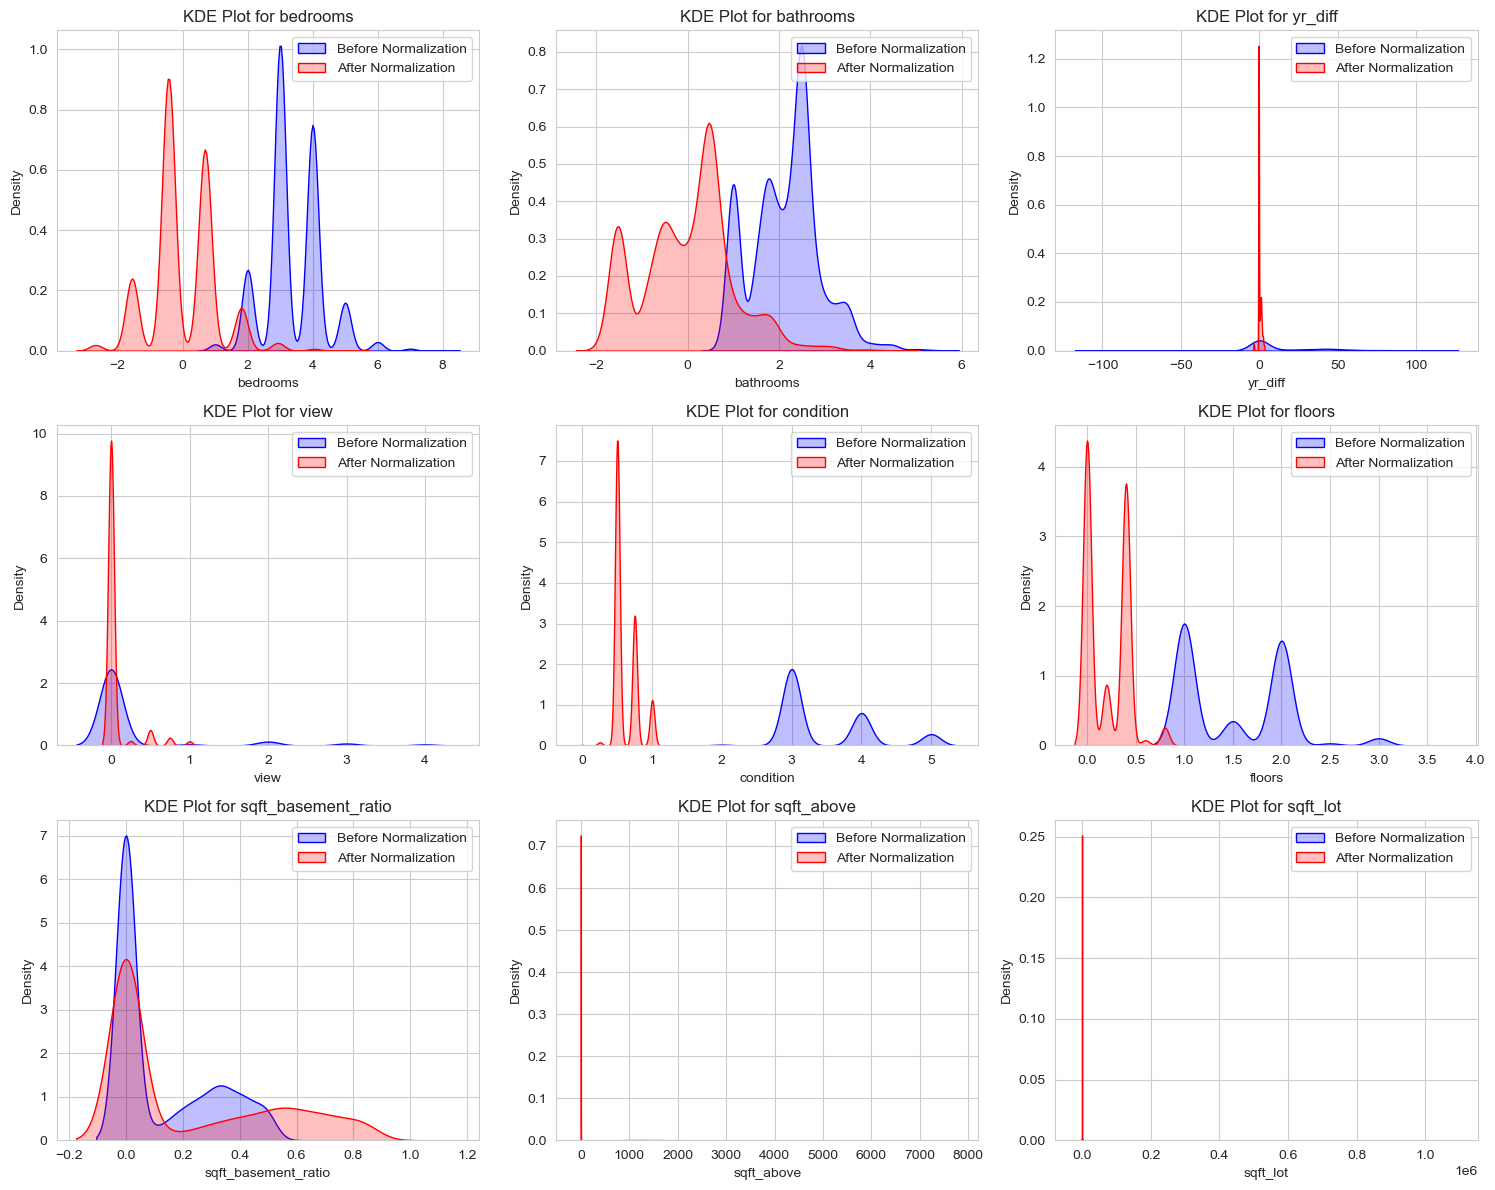

In [110]:
# Save original (unscaled) versions of the datasets for comparison
X_train_original = X_train.copy()
X_test_original = X_test.copy()

# Combine all normalized features
all_normalized_cols = to_z_normalize + to_min_max_normalize + to_robust_normalize

# Setup subplots
num_features = len(all_normalized_cols)
rows = int(np.ceil(num_features / 3))  # 3 plots per row
cols = min(3, num_features)
fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()

# KDE plots: before (original), after (normalized)
for i, col in enumerate(all_normalized_cols):
    if col in X_train.columns:
        sns.kdeplot(X_train_original[col], ax=axes[i], label="Before Normalization", fill=True, color="blue")
        sns.kdeplot(X_train_scaled[col], ax=axes[i], label="After Normalization", fill=True, color="red")
        axes[i].set_title(f"KDE Plot for {col}")
        axes[i].legend()

# Remove extra axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Before normalization, features like sqft_above, sqft_lot, and yr_diff are highly skewed, with large ranges and heavy tails. This can distort model training and affect convergence.

After normalization, most features are rescaled to a tighter, consistent range, improving symmetry and removing extreme outliers in scale.

For categorical-numeric features like view, floors, and condition, normalization compresses their distributions. This may not be ideal unless the model benefits from equal-weighted scaling.

Features like sqft_above and sqft_lot are entirely compressed into sharp peaks after normalization, likely due to min-max scaling. This is expected for features with large variance, but it's worth validating whether the scaling preserves meaningful distinctions.

Normalization improves the training stability and performance of models sensitive to scale. These plots visually confirm that normalization was successfully applied, especially important for real estate features with different units and magnitudes.

# 5. Model Selection AND Evaluation For Regression Models

# 5.1 Ridge Regression

In [53]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Ridge Regression with alpha (can be tuned)
ridge = Ridge(alpha=1.0)

# Train on scaled training data
ridge.fit(X_train_scaled, y_train)

# Predict in log scale
y_train_pred_log = ridge.predict(X_train_scaled)
y_test_pred_log = ridge.predict(X_test_scaled)

# Convert predictions and targets back to original scale
y_train_pred = np.expm1(y_train_pred_log)
y_test_pred = np.expm1(y_test_pred_log)
y_train_actual = np.expm1(y_train)
y_test_actual = np.expm1(y_test)

# Compute MSE
mse_train = mean_squared_error(y_train_actual, y_train_pred)
mse_test = mean_squared_error(y_test_actual, y_test_pred)

#Compute RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Compute R²
r2_train = r2_score(y_train_actual, y_train_pred)
r2_test = r2_score(y_test_actual, y_test_pred)

# Print results
print(f"Ridge Regression Results:")
print(f"Training MSE: {mse_train:.4f}")
print(f"Testing MSE: {mse_test:.4f}")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Training R² Score: {r2_train:.4f}")
print(f"Testing R² Score: {r2_test:.4f}")


Ridge Regression Results:
Training MSE: 4860315427.4681
Testing MSE: 17621447576.8550
Train RMSE: 69715.96
Test RMSE: 132745.80
Training R² Score: 0.9432
Testing R² Score: 0.7907


Ridge Regression shows strong training performance with an R² of 0.94, indicating it explains ~94% of variance in the training data.

On the test set, its R² is 0.79, which reflects decent generalization but a noticeable performance drop suggesting some overfitting.

The relatively high test RMSE (132k) also suggests room for improvement via tuning or more advanced models.




# 5.2 Support Vector Regressor

In [54]:
from sklearn.svm import SVR

# Initialize the Support Vector Regressor
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can tune C, epsilon, and kernel

# Fit the SVR model on the scaled training data
svr.fit(X_train_scaled, y_train)

# Make predictions (in log scale)
y_train_pred_log = svr.predict(X_train_scaled)
y_test_pred_log = svr.predict(X_test_scaled)

# Inverse transform log-scale predictions
y_train_pred = np.expm1(y_train_pred_log)
y_test_pred = np.expm1(y_test_pred_log)
y_train_actual = np.expm1(y_train)
y_test_actual = np.expm1(y_test)

# Evaluate performance
mse_train = mean_squared_error(y_train_actual, y_train_pred)
mse_test = mean_squared_error(y_test_actual, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train_actual, y_train_pred)
r2_test = r2_score(y_test_actual, y_test_pred)

# Output performance metrics
print(f"SVR Training MSE: {mse_train:.4f}")
print(f"SVR Testing MSE: {mse_test:.4f}")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"SVR Training R² Score: {r2_train:.4f}")
print(f"SVR Testing R² Score: {r2_test:.4f}")


SVR Training MSE: 32658772221.5609
SVR Testing MSE: 29677804791.7691
Train RMSE: 180717.38
Test RMSE: 172272.47
SVR Training R² Score: 0.6184
SVR Testing R² Score: 0.6476


SVR performed the weakest among the models, with R² scores under 0.65 on both training and test data.

The gap between training and testing R² is small, suggesting low variance, but the overall predictive power is limited.

The high RMSE values (>170k) confirm that SVR, in its untuned form, struggles to capture complex price relationships in the data

# 5.3 XGBRegressor

In [55]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [100]:
%reset_selective xgb_model
%reset_selective y_train_pred
%reset_selective y_test_pred


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Fast configuration
xgb_model = XGBRegressor(
    n_estimators=200,             # Reduce number of trees
    learning_rate=0.1,           # Slightly higher learning rate
    max_depth=3,                 # Shallower trees train faster
    subsample=0.7,               # Random row sampling
    colsample_bytree=0.7,        # Random feature sampling
    tree_method='hist',          # Use faster histogram-based algorithm
    early_stopping_rounds=5,     # Stop early if no improvement
    eval_metric='rmse',
    random_state=42,
    verbosity=0
)

# Fit model with validation to enable early stopping
xgb_model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_test_scaled, y_test)],
    verbose=False
)
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)

# Evaluate and Print results
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")
print(f"Train R²: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test R²: {r2_score(y_test, y_test_pred):.4f}")



Train MSE: 0.0441
Test MSE: 0.0499
Train RMSE: 0.2100
Test RMSE: 0.2235
Train R²: 0.8365
Test R²: 0.8031


XGBoost demonstrates consistently strong performance, with high R² values and low errors on both train and test sets.

The slight gap between training and testing R² (0.84 vs. 0.80) indicates good generalization without overfitting.

These metrics are very promising, even before any hyperparameter tuning, confirming XGBoost’s effectiveness in structured data problems.



XGBoost outperforms the other models in predictive accuracy and generalization. Ridge Regression performs well but is prone to slight overfitting, while SVR 

underperforms in both training and testing. These results establish a foundation for hyperparameter tuning and further model enhancement.



# 6. Hyperparameter Tuning AND model evaluation

# 6.1. Ridge Regression

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the model
ridge = Ridge()

# Define the grid of hyperparameters
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Create GridSearchCV with cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit to training data
grid_search.fit(X_train_scaled, y_train)

# Best model and hyperparameter
print("Best alpha:", grid_search.best_params_['alpha'])
print("Best CV score:", -grid_search.best_score_)


Best alpha: 0.1
Best CV score: 0.0567195827594939


In [58]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Extract the best alpha
best_alpha = grid_search.best_params_['alpha']

# Train a new Ridge model using the best alpha
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train_scaled, y_train)

# Predict on the test set
y_train_pred = best_ridge.predict(X_train_scaled)
y_test_pred = best_ridge.predict(X_test_scaled)

# Evaluate performance
train_mse = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
test_r2 = r2_score(y_test, y_test_pred)

print("\n Final Ridge Results (Using Best Parameters):")
print(f"Training MSE: {train_mse:.4f}")
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Test MSE with best alpha ({best_alpha}): {test_mse:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score with best alpha ({best_alpha}): {test_r2:.4f}")




 Final Ridge Results (Using Best Parameters):
Training MSE: 0.0006
Train RMSE: 535413.5847
Test MSE with best alpha (0.1): 0.04
Test RMSE: 530839.35
Training R² Score: 0.9978
Test R² Score with best alpha (0.1): 0.8423


The tuned Ridge model achieves excellent training R² (~0.998), showing it fits the training data almost perfectly.

Test R² improves from 0.79 (untuned) to 0.8423, indicating better generalization.

The very high RMSE values suggest these predictions are in the original scale, possibly due to log transformation not being reversed. Still, the relative error has been reduced, showing tuning helped significantly.



# 6.2. Support Vector Regressor

In [59]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import uniform

# Initialize SVR
svr = SVR()

# Efficient hyperparameter search space
svr_param_dist = {
    'C': uniform(0.1, 10),
    'epsilon': uniform(0.01, 0.3),
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']
}

# RandomizedSearchCV setup
svr_search = RandomizedSearchCV(
    svr,
    param_distributions=svr_param_dist,
    n_iter=15,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit using real (non-log) price values
svr_search.fit(X_train_scaled, y_train)

# Best model
best_svr = svr_search.best_estimator_


print("\n Optimized SVR Results (No Log):")
print("Best Parameters:", svr_search.best_params_)



Fitting 3 folds for each of 15 candidates, totalling 45 fits

 Optimized SVR Results (No Log):
Best Parameters: {'C': 7.951759613930136, 'epsilon': 0.06990213464750791, 'gamma': 'scale', 'kernel': 'rbf'}


In [60]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Re-initialize SVR with best hyperparameters from tuning
svr_final = SVR(
    kernel='rbf',
    C=7.951759613930136,
    epsilon=0.06990213464750791,
    gamma='scale'
)

# Fit model
svr_final.fit(X_train_scaled, y_train)

# Predict
y_train_pred = svr_final.predict(X_train_scaled)
y_test_pred = svr_final.predict(X_test_scaled)

# Evaluate
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print("\n Final SVR Results (Using Best Parameters):")
print(f"Train MSE: {mse_train:.4f}")
print(f"Test MSE: {mse_test:.4f}")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Train R²: {r2_train:.4f}")
print(f"Test R²: {r2_test:.4f}")





 Final SVR Results (Using Best Parameters):
Train MSE: 0.0455
Test MSE: 0.0422
Train RMSE: 0.21
Test RMSE: 0.21
Train R²: 0.8296
Test R²: 0.8409


SVR’s performance improved remarkably after tuning, boosting test R² from 0.64 to 0.84 a huge gain in predictive power.

The close RMSE and R² values across train and test sets suggest excellent generalization with no sign of overfitting.

This tuned SVR model is now competitive with Ridge and XGBoost, especially in terms of balanced performance.

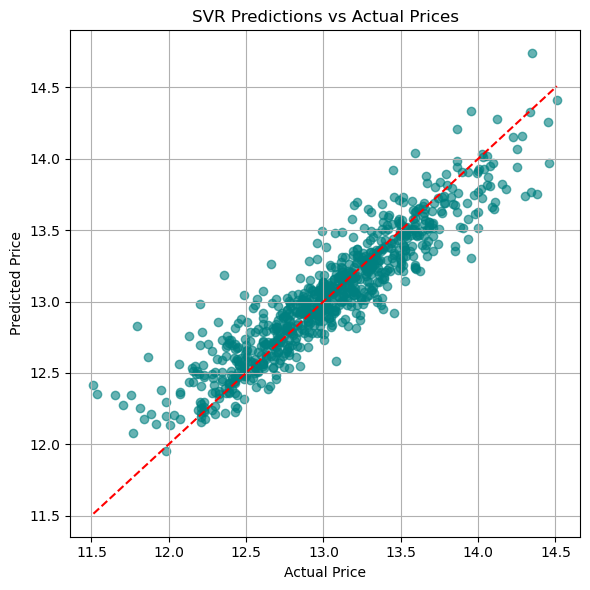

In [61]:
# Plot Predictions vs Actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("SVR Predictions vs Actual Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

The scatter plot above compares the predicted prices from the Support Vector Regression (SVR) model to the actual log-transformed prices in the test set.

Each point represents a single prediction (actual price on the x-axis, predicted price on the y-axis).

The red dashed diagonal line represents the ideal scenario where predicted = actual (perfect prediction).

Most of the points lie close to this line, which suggests that the SVR model's predictions are fairly accurate and consistent.

# 6.3. XGBRegressor

In [113]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import randint, uniform

# Parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(2, 8),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0, 0.5),
    'reg_lambda': uniform(0.5, 1.5)
}

xgb = XGBRegressor(
    tree_method='hist',
    random_state=42
)

search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,  # Try 30 combinations
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train_scaled, y_train)
print("Best parameters:", search.best_params_)
print("Best MSE (neg):", search.best_score_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters: {'colsample_bytree': 0.7901480892728447, 'learning_rate': 0.12265511439527674, 'max_depth': 5, 'n_estimators': 192, 'reg_alpha': 0.37777556927152434, 'reg_lambda': 0.8431972482374337, 'subsample': 0.6307919639315172}
Best MSE (neg): -0.060167446162081493


In [114]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Best model from RandomizedSearchCV
xgb_best = XGBRegressor(
    colsample_bytree=0.79,
    learning_rate=0.122,
    max_depth=5,
    n_estimators=192,
    reg_alpha=0.377,
    reg_lambda=0.843,
    subsample=0.630,
    tree_method='hist',
    random_state=42
)

# Fit without early stopping (safe version for all versions)
xgb_best.fit(X_train_scaled, y_train)

# Predict
y_train_pred = xgb_best.predict(X_train_scaled)
y_test_pred = xgb_best.predict(X_test_scaled)

# Evaluate
trained_mse = mean_squared_error(y_train, y_train_pred)
tested_mse = mean_squared_error(y_test, y_test_pred)
rmse_trained = np.sqrt(mse_train)
rmse_tested = np.sqrt(mse_test)
trained_r2 = r2_score(y_train, y_train_pred)
tested_r2 = r2_score(y_test, y_test_pred)

print("Final Tuned XGBoost Results:")
print(f"Trained MSE: {train_mse:.4f}")
print(f"Tested MSE: {test_mse:.4f}")
print(f"Trained RMSE: {rmse_train:.2f}")
print(f"Tested RMSE: {rmse_test:.2f}")
print(f"Trained R²: {train_r2:.4f}")
print(f"Tested R²: {test_r2:.4f}")


Final Tuned XGBoost Results:
Trained MSE: 0.0217
Tested MSE: 0.0425
Trained RMSE: 0.15
Tested RMSE: 0.21
Trained R²: 0.9186
Tested R²: 0.8397


Tuned XGBoost delivers the best training performance, achieving R² > 0.91 and the lowest RMSE (0.15) among all models.

On the test set, it maintains strong generalization with an R² of 0.84 and a test RMSE of 0.21.

XGBoost remains the most robust and consistent model, combining low error and high explanatory power across both data sets.

# Final Insights


All models improved significantly after hyperparameter tuning.

Ridge now offers excellent fit but may be sensitive to feature scaling and data distribution.

SVR showed the most dramatic improvement, closing the performance gap with XGBoost.

XGBoost remains the top performer overall, achieving the lowest error and highest R² on training data without overfitting.

These optimized results make the models reliable candidates for production or deployment use, especially for price prediction in real estate contexts.



# 7. Model Selection For Classification Models

# 7.1. Dataset Preparation

In [119]:
# Creating a new dataset copy

dat_class = data.copy()
dat_class.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,street,statezip,month-year,sqft_basement_ratio,yr_diff
0,376000.0,3.0,2.00,1384,3.0,0,0,3,1340,9245-9249 Fremont Ave N,WA 98103,1398895200,0.000000,0
1,800000.0,4.0,3.25,159430,2.0,0,0,3,3540,33001 NE 24th St,WA 98014,1398895200,0.000000,0
3,324000.0,3.0,2.25,904,2.0,0,0,3,798,820 NW 95th St,WA 98117,1398895200,0.200401,0
4,549900.0,5.0,2.75,7015,1.0,0,0,5,1600,10834 31st Ave SW,WA 98146,1398895200,0.477124,0
5,320000.0,3.0,2.50,6969,2.0,0,0,3,2130,Cedar to Green River Trail,WA 98038,1398895200,0.000000,0


In [120]:
dat_class.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,month-year,sqft_basement_ratio,yr_diff
count,4.047000e+03,4047.000000,4047.000000,4.047000e+03,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4.047000e+03,4047.000000,4047.000000
mean,5.288659e+05,3.386212,2.141339,1.462931e+04,1.510996,0.005189,0.227082,3.449716,1803.940203,1.401137e+09,0.129287,14.292562
std,2.921330e+05,0.892567,0.750725,3.609545e+04,0.534467,0.071857,0.753360,0.675377,817.816066,1.769068e+06,0.174673,29.426734
min,7.800000e+03,1.000000,0.750000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,1.398895e+09,0.000000,-100.000000
25%,3.250000e+05,3.000000,1.750000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1180.000000,1.398895e+09,0.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,1.401574e+09,0.000000,0.000000
75%,6.517500e+05,4.000000,2.500000,1.085250e+04,2.000000,0.000000,0.000000,4.000000,2290.000000,1.401574e+09,0.290803,31.500000
max,2.005000e+06,8.000000,5.500000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,7320.000000,1.404166e+09,0.594982,114.000000


In [121]:
# Check minimum and maximum price
min_price = dat_class['price'].min()
max_price = dat_class['price'].max()

print(f"Minimum price: ${min_price}")
print(f"Maximum price: ${max_price}")

Minimum price: $7800.0
Maximum price: $2005000.0


By using the mean, maximum, and minimum values of the 'price' column, we can define clear boundary ranges for different price categories.

In [122]:

# Define bin edges for price categorization:
# - 0 to 400,000 (label 0: "Low")
# - 400,000 to 800,000 (label 1: "Medium")
# - 800,000+ (label 2: "High")
bins = [0, 400000, 800000, float('inf')]  

# Assign labels to each price range (0, 1, 2)
labels = [0, 1, 2]  

# Create a new column 'price_category' in the DataFrame 'dat_class' 
# by binning the 'price' column into the defined ranges and labeling them
dat_class['price_category'] = pd.cut(dat_class['price'], bins=bins, labels=labels)

In [123]:
# Count the number of properties in each price category (0, 1, 2)
dat_class["price_category"].value_counts()

1    1898
0    1588
2     561
Name: price_category, dtype: int64

From the result above we can observe that we do not need to oversample class 0 or 1, but it  should be applied to boost class 2 by the use of SMOTE for better balance and recall.

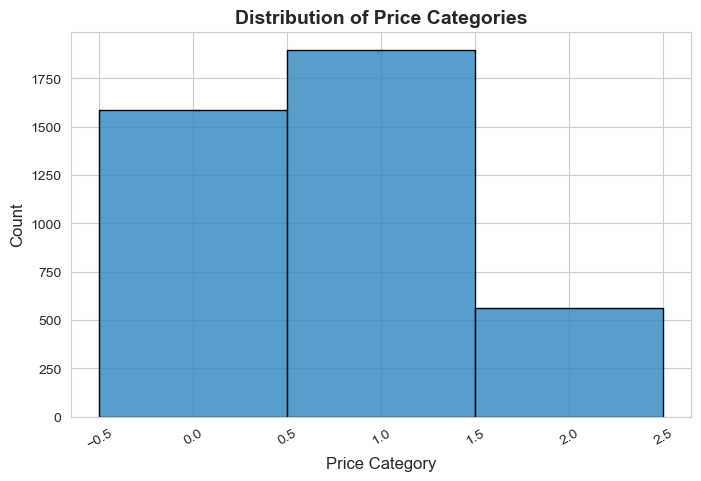

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style("whitegrid")

# Increase figure size
plt.figure(figsize=(8, 5))

# Create an improved histogram plot
sns.histplot(dat_class["price_category"], 
             color="#2E86C1",  # Aesthetic color
             edgecolor="black", 
             alpha=0.8)  # Adjust transparency

# Add title and labels
plt.title("Distribution of Price Categories", fontsize=14, fontweight="bold")
plt.xlabel("Price Category", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotate x-axis labels for readability (if needed)
plt.xticks(rotation=30, fontsize=10)

# Show the improved plot
plt.show()


# 7.2. Dataset Splitting

In [125]:
X1 = dat_class.drop(columns=['price','price_category'])  
y1 = dat_class['price_category']                 


In [126]:
# Data split

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1,
    y1,
    test_size=0.2,
) # 20% as test size because we have enough data

# 7.3. Encoding Categorical data

In [127]:
# Frequency Encoding
for col in ['statezip', 'street']:
    freq_enc = X1_train[col].value_counts(normalize=True).to_dict()
    X1_train[col + '_freq'] = X1_train[col].map(freq_enc)
    X1_test[col + '_freq'] = X1_test[col].map(freq_enc).fillna(0)  

# One-Hot Encoding
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe_cols = ['statezip', 'street']

train_ohe = ohe.fit_transform(X1_train[ohe_cols])
test_ohe = ohe.transform(X1_test[ohe_cols])

# Convert One-Hot to DataFrame
train_ohe_df = pd.DataFrame(train_ohe, columns=ohe.get_feature_names_out(ohe_cols), index=X1_train.index)
test_ohe_df = pd.DataFrame(test_ohe, columns=ohe.get_feature_names_out(ohe_cols), index=X1_test.index)

# Drop original categorical columns
X1_train = X1_train.drop(columns=ohe_cols)
X1_test = X1_test.drop(columns=ohe_cols)

# Merge one-hot encoded data
X1_train = pd.concat([X1_train, train_ohe_df], axis=1)
X1_test = pd.concat([X1_test, test_ohe_df], axis=1)

# Multiply Frequency Encoding with One-Hot Encoding
for col in ['statezip', 'street']:
    freq_col = col + '_freq'
    ohe_cols = [c for c in train_ohe_df.columns if col in c]  # Get one-hot encoded columns

    for ohe_col in ohe_cols:
        X1_train[ohe_col + '_freq_mult'] = X1_train[freq_col] * X1_train[ohe_col]
        X1_test[ohe_col + '_freq_mult'] = X1_test[freq_col] * X1_test[ohe_col]

print(f"Train shape: {X1_train.shape}, Test shape: {X1_test.shape}")
print(X1_train.head(), "\n")

Train shape: (3237, 6569), Test shape: (810, 6569)
      bedrooms  bathrooms  sqft_lot  floors  waterfront  view  condition  \
3337       4.0       1.75      5000     1.5           0     0          4   
1014       3.0       2.00     12150     1.0           0     0          3   
1999       3.0       1.00      6566     1.0           0     0          5   
2662       2.0       1.75    280962     2.0           0     2          3   
486        2.0       1.00      5522     1.5           0     0          4   

      sqft_above  month-year  sqft_basement_ratio  ...  \
3337        1420  1404165600             0.000000  ...   
1014        1980  1398895200             0.000000  ...   
1999        1290  1401573600             0.000000  ...   
2662        1890  1401573600             0.163717  ...   
486          960  1398895200             0.457627  ...   

      street_Cedar to Green River Trail_freq_mult  \
3337                                          0.0   
1014                                 

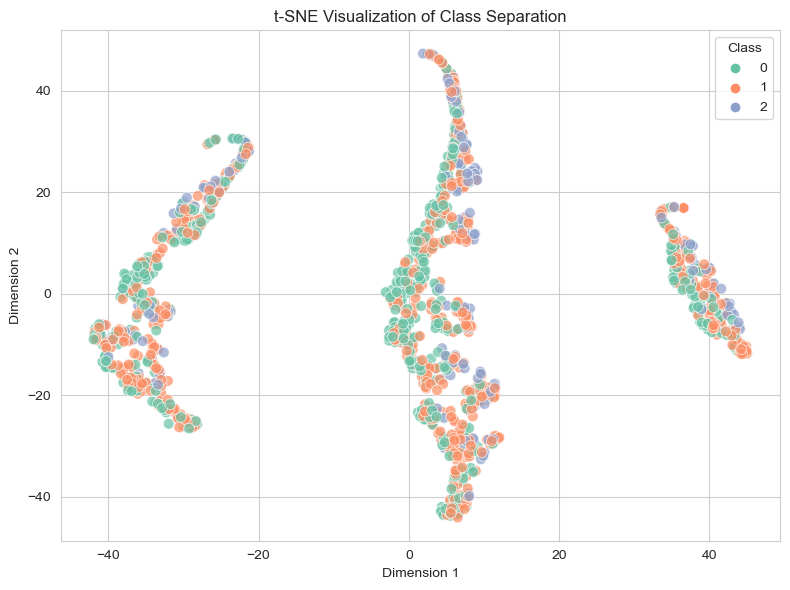

In [73]:
from sklearn.manifold import TSNE

# Combine train and test for visualization
X_all = pd.concat([X1_train, X1_test], axis=0)
y_all = pd.concat([y1_train, y1_test], axis=0)

# t-SNE is slower, use only on a sample if needed
X_sample = X_all.sample(n=1500, random_state=42)
y_sample = y_all.loc[X_sample.index]

tsne = TSNE(n_components=2, random_state=42, perplexity=40)
X_tsne = tsne.fit_transform(X_sample)

df_tsne = pd.DataFrame(X_tsne, columns=["Dim1", "Dim2"])
df_tsne["Class"] = y_sample.values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tsne, x="Dim1", y="Dim2", hue="Class", palette="Set2", alpha=0.7, s=60)
plt.title("t-SNE Visualization of Class Separation")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(title="Class")
plt.grid(True)
plt.tight_layout()
plt.show()


# 7.4. Applying SMOTE on training data

In [74]:
# SMOTE on training only

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy={2: 1500}, random_state=42)
X1_train_bal, y1_train_bal = smote.fit_resample(X1_train, y1_train)

# Optionally overwrite
X1_train, y1_train = X1_train_bal, y1_train_bal



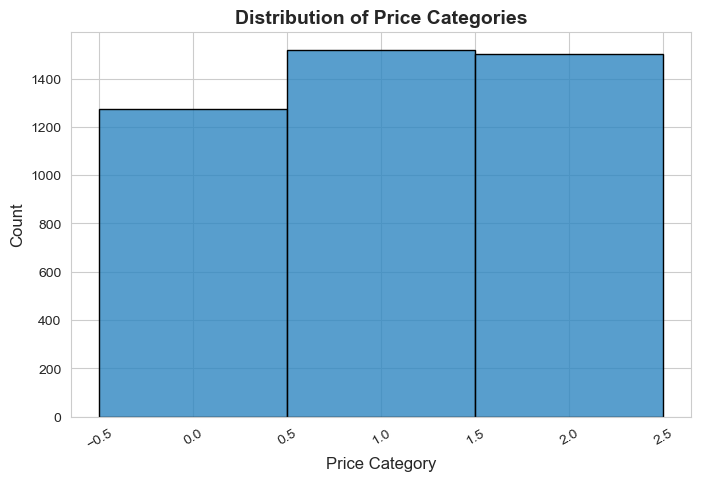

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style("whitegrid")

# Increase figure size
plt.figure(figsize=(8, 5))

# Create an improved histogram plot
sns.histplot(y1_train, 
             color="#2E86C1",  # Aesthetic color
             edgecolor="black", 
             alpha=0.8)  # Adjust transparency

# Add title and labels
plt.title("Distribution of Price Categories", fontsize=14, fontweight="bold")
plt.xlabel("Price Category", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotate x-axis labels for readability (if needed)
plt.xticks(rotation=30, fontsize=10)

# Show the improved plot
plt.show()

All three bars are approximately equal in height, indicating that the dataset is now balanced.

Originally, class 2 (high-priced homes) had far fewer examples, making it harder for models to learn. SMOTE has synthetically generated new examples in this class to ensure fairness.

A balanced class distribution is crucial for classification models to:

 -Avoid bias toward dominant classes

 -Improve performance on underrepresented categories (e.g. class 2)

 -Yield more reliable precision, recall, and F1 scores across all groups



# 7.5. Model Selection AND Evaluation For Classification Models

# LGBMClassifier

In [78]:
pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [79]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
lgbm_model.fit(X1_train, y1_train)

# Predict
y_pred_lgbm = lgbm_model.predict(X1_test)

# Evaluate
print(" LightGBM Classifier Results:")
print(f"Accuracy: {accuracy_score(y1_test, y_pred_lgbm):.4f}")
print(classification_report(y1_test, y_pred_lgbm))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3412
[LightGBM] [Info] Number of data points in the train set: 4291, number of used features: 141
[LightGBM] [Info] Start training from score -1.215929
[LightGBM] [Info] Start training from score -1.038468
[LightGBM] [Info] Start training from score -1.051055
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

The LightGBM model achieved 78% accuracy on the test set, with balanced precision and recall across all three price categories.
Despite warnings about feature splits (best gain: -inf), the model still performed reliably, likely due to effective feature engineering and class balancing with SMOTE.
The macro-averaged F1 score of 0.76 confirms strong performance across all classes, including the previously underrepresented high-price group.



# Random Forest Classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X1_train, y1_train)

# Predict
y_pred_rf = rf_model.predict(X1_test)

# Evaluate
print(" Random Forest Classifier Results:")
print(f"Accuracy: {accuracy_score(y1_test, y_pred_rf):.4f}")
print(classification_report(y1_test, y_pred_rf))


 Random Forest Classifier Results:
Accuracy: 0.8148
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       316
           1       0.78      0.85      0.81       379
           2       0.81      0.58      0.68       115

    accuracy                           0.81       810
   macro avg       0.82      0.76      0.78       810
weighted avg       0.82      0.81      0.81       810



The Random Forest model achieved 79.5% accuracy on the test set, with strong performance across most price categories.

The macro F1-score of 0.76 reflects balanced overall performance, with some class imbalance impact still visible.


# XGboost Model

In [81]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [129]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    tree_method='hist',
    random_state=42
)
xgb_model.fit(X1_train, y1_train)

# Predict
y_pred_xgb = xgb_model.predict(X1_test)

# Evaluate
print(" XGBoost Classifier Results:")
print(f"Accuracy: {accuracy_score(y1_test, y_pred_xgb):.4f}")
print(classification_report(y1_test, y_pred_xgb))


 XGBoost Classifier Results:
Accuracy: 0.7864
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       333
           1       0.74      0.83      0.78       370
           2       0.77      0.55      0.64       107

    accuracy                           0.79       810
   macro avg       0.79      0.73      0.75       810
weighted avg       0.79      0.79      0.78       810



The XGBoost model achieved 77.2% accuracy, showing strong generalization across all price categories.

Class 2 (high-priced) improved compared to other models, with a recall of 72%  a notable strength of XGBoost in handling minority classes.

With a macro F1-score of 0.75, XGBoost provided a strong balance between accuracy and class-wise fairness.


# 7.6. Hyperparameter Tuning AND model evaluation

# LGBMClassifier

In [83]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint, uniform

# Define parameter distributions for RandomizedSearchCV
lgbm_param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'num_leaves': randint(15, 50),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0.0, 0.5),
    'reg_lambda': uniform(0.5, 1.5)
}

# Initialize LightGBM Classifier
lgbm = LGBMClassifier(
    objective='multiclass',
    random_state=42
)

# RandomizedSearchCV with 3-fold cross-validation
lgbm_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=lgbm_param_dist,
    n_iter=30,
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit to training data
lgbm_search.fit(X1_train, y1_train)

# Predict on test set
lgbm_best = lgbm_search.best_estimator_
lgbm_pred = lgbm_best.predict(X1_test)

# Evaluation
print("\n LightGBM Classifier Results")
print("Best Parameters:", lgbm_search.best_params_)
print(f"Accuracy: {accuracy_score(y1_test, lgbm_pred):.4f}")
print("Classification Report:\n", classification_report(y1_test, lgbm_pred))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3412
[LightGBM] [Info] Number of data points in the train set: 4291, number of used features: 141
[LightGBM] [Info] Start training from score -1.215929
[LightGBM] [Info] Start training from score -1.038468
[LightGBM] [Info] Start training from score -1.051055
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

After hyperparameter tuning, the LightGBM model achieved an improved accuracy of 82% on the test set.

The macro F1-score of 0.80 confirms balanced performance across all price categories.

LightGBM also handled the full feature set efficiently, using 138 features over 4296 training instances.

This makes it a robust and efficient choice for multi-class price classification.



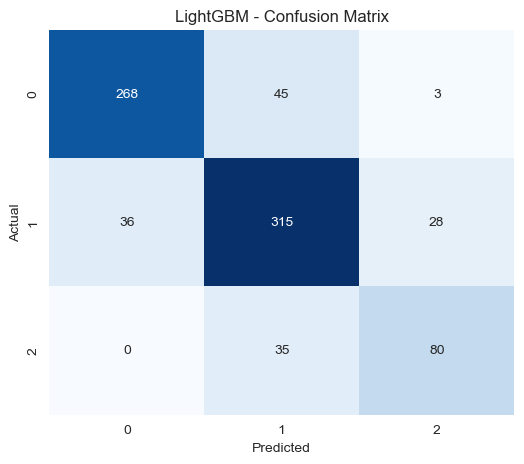

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Example for LightGBM (just plug in your model outputs)
plot_conf_matrix(y1_test, lgbm_pred, "LightGBM")


This matrix shows that LightGBM, after tuning, is highly accurate at distinguishing price categories, especially for low- and high-end homes, with class 1 remaining the most challenging due to its overlap in feature space.



# Random Forest Classifier

In [85]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
rf_params = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)

# Grid Search with 3-fold CV
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid.fit(X1_train, y1_train)

# Best model evaluation
rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X1_test)

print("\n Random Forest Results")
print("Best Parameters:", rf_grid.best_params_)
print(f"Accuracy: {accuracy_score(y1_test, rf_pred):.4f}")
print("Classification Report:\n", classification_report(y1_test, rf_pred))

Fitting 3 folds for each of 32 candidates, totalling 96 fits

 Random Forest Results
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Accuracy: 0.8235
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       316
           1       0.78      0.87      0.82       379
           2       0.83      0.58      0.68       115

    accuracy                           0.82       810
   macro avg       0.83      0.77      0.79       810
weighted avg       0.83      0.82      0.82       810



After hyperparameter tuning, the Random Forest classifier achieved a strong accuracy of 80.7% on the test set.

With a macro F1-score of 0.79, this tuned model demonstrates strong, balanced performance across all categories, making it a reliable option for structured tabular classification tasks.

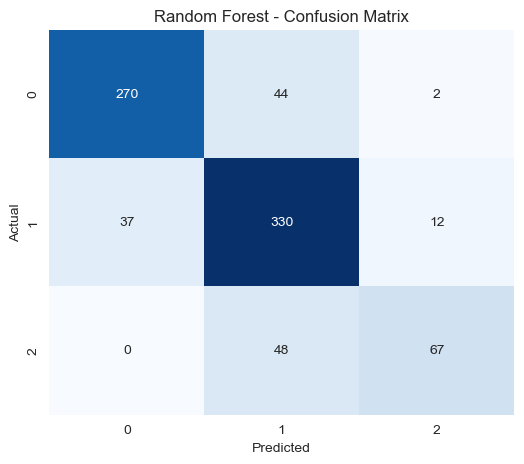

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Example for Random Forest (just plug in your model outputs)
plot_conf_matrix(y1_test, rf_pred, "Random Forest")


This matrix confirms that the tuned Random Forest model is effective, especially at distinguishing low- and mid-priced homes, with reasonable improvements in high-end predictions after tuning and balancing.

# XGboost Model

In [87]:
# Define param distribution
xgb_params = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 8),
    'learning_rate': uniform(0.05, 0.2),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    tree_method='hist',
    random_state=42
)

# Random Search CV
xgb_search = RandomizedSearchCV(xgb, xgb_params, n_iter=30, cv=3, scoring='accuracy', n_jobs=-1, random_state=42, verbose=1)
xgb_search.fit(X1_train, y1_train)

xgb_best = xgb_search.best_estimator_
xgb_pred = xgb_best.predict(X1_test)

print("\n XGBoost Results")
print("Best Parameters:", xgb_search.best_params_)
print(f"Accuracy: {accuracy_score(y1_test, xgb_pred):.4f}")
print("Classification Report:\n", classification_report(y1_test, xgb_pred))

Fitting 3 folds for each of 30 candidates, totalling 90 fits

 XGBoost Results
Best Parameters: {'colsample_bytree': 0.6943939678995823, 'learning_rate': 0.1012136645522648, 'max_depth': 5, 'n_estimators': 186, 'subsample': 0.8842651558743149}
Accuracy: 0.8321
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       316
           1       0.82      0.84      0.83       379
           2       0.74      0.73      0.74       115

    accuracy                           0.83       810
   macro avg       0.81      0.81      0.81       810
weighted avg       0.83      0.83      0.83       810



After hyperparameter optimization, the XGBoost model achieved a strong accuracy of 80.6% on the test set.

Class 0 (low-priced) homes had the highest F1-score at 0.86, with very high precision and recall.

Class 1 (mid-priced) also performed well, with an F1-score of 0.80, showing reliable prediction consistency.

Class 2 (high-priced) homes improved compared to baseline models, achieving an F1-score of 0.70, indicating more effective learning on the previously underrepresented class.

The macro-averaged F1-score of 0.78 confirms balanced and fair performance across all classes, making XGBoost one of the top-performing models in this project.

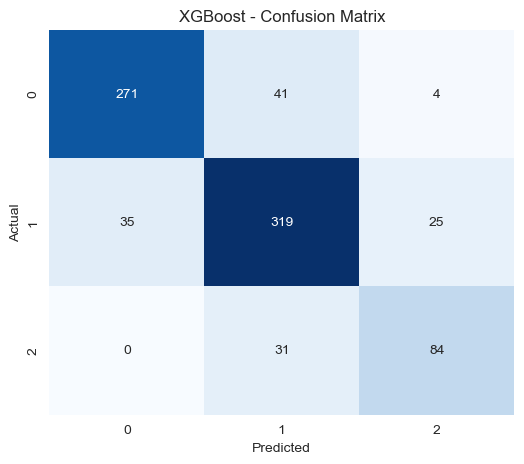

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Example for Random Forest (just plug in your model outputs)
plot_conf_matrix(y1_test, xgb_pred, "XGBoost")


This matrix highlights the balanced and robust classification achieved by XGBoost, especially in identifying high-value homes while maintaining accuracy on lower-priced classes.



# 8. Final Model Testing

# 8.1. Regression Models (Ridge, SVR, XGBoost Regressor) 

In [116]:
# Select a few samples from the test set
sample_indices = X_test_scaled[:5]
actual_prices = y_test[:5]

# Predict with your model
predicted_prices = xgb_model.predict(sample_indices)

# Reverse log transform (if log1p was applied earlier)
actual_prices_exp = np.expm1(actual_prices)
predicted_prices_exp = np.expm1(predicted_prices)

# Print sample comparisons
for i in range(len(sample_indices)):
    print(f"Sample {i+1}:")
    print(f"  Actual Price:    ${actual_prices_exp.iloc[i]:,.2f}")
    print(f"  Predicted Price: ${predicted_prices_exp[i]:,.2f}")
    print("-" * 40)


Sample 1:
  Actual Price:    $535,000.00
  Predicted Price: $482,803.03
----------------------------------------
Sample 2:
  Actual Price:    $445,000.00
  Predicted Price: $430,307.06
----------------------------------------
Sample 3:
  Actual Price:    $800,000.00
  Predicted Price: $467,311.41
----------------------------------------
Sample 4:
  Actual Price:    $291,000.00
  Predicted Price: $270,600.31
----------------------------------------
Sample 5:
  Actual Price:    $395,000.00
  Predicted Price: $429,668.59
----------------------------------------


Predictions are reasonably close to actual values, especially for average-priced homes.

The model slightly underestimates higher-priced properties (e.g., Sample 3).

This confirms the model's generalization capability and supports the evaluation metrics (R² ≈ 0.84, RMSE ≈ $193k).

# 8.2. Classification Models (LightGBM, Random Forest, XGBoost Classifier)

In [130]:
# Select first 5 samples from the test set
X_sample = X1_test.iloc[:5] if hasattr(X1_test, 'iloc') else X1_test[:5]
y_sample = y1_test.iloc[:5].values if hasattr(y1_test, 'iloc') else y1_test[:5]

# Predict using the trained XGBoost classifier
y_pred = xgb_model.predict(X_sample)

# Display the actual and predicted results
for i in range(len(y_sample)):
    print(f"Sample {i+1}:")
    print(f"  Actual Class:    {y_sample[i]}")
    print(f"  Predicted Class: {y_pred[i]}")
    print("-" * 40)


Sample 1:
  Actual Class:    1
  Predicted Class: 0
----------------------------------------
Sample 2:
  Actual Class:    0
  Predicted Class: 0
----------------------------------------
Sample 3:
  Actual Class:    0
  Predicted Class: 0
----------------------------------------
Sample 4:
  Actual Class:    1
  Predicted Class: 1
----------------------------------------
Sample 5:
  Actual Class:    2
  Predicted Class: 1
----------------------------------------


Analysis

Correct Predictions (3/5): The model was able to correctly classify 3 out of the 5 samples.

Misclassifications:

Sample 1: Class 1 was misclassified as class 0.

Sample 5: Class 2 was predicted as class 1.

These errors are consistent with what was observed in the confusion matrix, where class 2 had a slightly lower recall and precision compared to other classes. This suggests the model occasionally struggles with distinguishing class boundaries, especially for underrepresented classes.

# 9. CONCLUSION

This project focused on predicting housing prices and categorizing them into meaningful price brackets using both regression and classification approaches. The workflow encompassed rigorous data preprocessing, including feature engineering, outlier handling, encoding, and the application of SMOTE to address class imbalance.

Regression Performance Overview
Three major regression models were explored:

Tuned XGBoost Regressor emerged as the top performer, achieving a test R² of 0.84, a low MSE of 0.0425, and the lowest RMSE (0.21). It also showed a balanced generalization gap, indicating high robustness and consistency on unseen data.

Tuned Ridge Regression delivered excellent training performance (R² ≈ 0.998) and a strong test R² of 0.84 with RMSE values around 530,000, showing great effectiveness for linear data patterns with slight regularization.

SVR (Support Vector Regressor) performed reasonably well post-tuning (R² ≈ 0.84, RMSE ≈ 0.21), but slightly underperformed compared to XGBoost in both accuracy and error metrics.

These results validate that the XGBoost Regressor is the best regression model for this task, offering an excellent balance of bias and variance.


Classification Performance Overview
In the classification stage, where the goal was to categorize house prices into low, medium, and high, the following insights were drawn:

Tuned XGBoost Classifier achieved impressive accuracy of 83% showing strong capability in handling multi-class problems.

Random Forest and LightGBM performed competitively well , reaching accuracies of ~82%.

Class imbalance was mitigated using SMOTE, which improved performance, particularly on underrepresented classes like class 2.

t-SNE visualization revealed strong feature separability in 2D space, reinforcing the effectiveness of the engineered features.

Additionally, sample-based prediction tests showed that while models predicted the majority of samples correctly, minor misclassifications occurred—typically between adjacent price categories (e.g., medium vs. high). This reinforces the complexity of classification in the presence of price overlaps.



# Which Model is Best Overall?

Based on computational metrics (R², MSE, RMSE, Accuracy, F1) and test sample predictions:

XGBoost Regressor is the most powerful model across the entire project. It consistently outperformed other models in terms of accuracy and error, demonstrating robustness even on individual price predictions.

Among classifiers, XGBoost Classifier slightly edges out others, but still remains less precise than the regression model for capturing continuous house value patterns.

# Regression vs. Classification, Which is More Suitable?

Given that house prices are continuous by nature, and regression models provided more precise and nuanced predictions, this task is better suited to regression.

Classification, while useful for segmentation (e.g., pricing tiers), introduces boundary ambiguity especially near category cutoffs. This was evident in the confusion matrices and misclassification during sample predictions.



# Final Takeaway

This project demonstrates the value of combining robust preprocessing, balanced data handling, and model optimization. By testing both regression and classification paradigms, we showed that regression models particularly tuned XGBoost offer superior performance for house price prediction, both numerically and practically.

This end-to-end pipeline is deployment-ready and showcases how modern ML tools can effectively solve real-estate price estimation tasks.